# Insurance Fraud Detection

# EDA 

The data was first explored to identify key trends and to identify features that may be more strongly correlated with fraudulent claims.

In [163]:
import numpy as np
import pandas as pd 
import itertools

# import phik
import scipy.stats as stats

# from phik import resources
# from phik.binning import bin_data
# from phik.report import plot_correlation_matrix

fraud_data = pd.read_csv("/Users/michaelhirschberger/Documents/Vehicle Insurance Claim Fraud Detection/fraud_oracle.csv")

In [164]:
fraud_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [165]:
fraud_data['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64

In [166]:
fraud_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [167]:
fraud_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [168]:
fraud_data.isnull().mean() * 100

Month                   0.0
WeekOfMonth             0.0
DayOfWeek               0.0
Make                    0.0
AccidentArea            0.0
DayOfWeekClaimed        0.0
MonthClaimed            0.0
WeekOfMonthClaimed      0.0
Sex                     0.0
MaritalStatus           0.0
Age                     0.0
Fault                   0.0
PolicyType              0.0
VehicleCategory         0.0
VehiclePrice            0.0
FraudFound_P            0.0
PolicyNumber            0.0
RepNumber               0.0
Deductible              0.0
DriverRating            0.0
Days_Policy_Accident    0.0
Days_Policy_Claim       0.0
PastNumberOfClaims      0.0
AgeOfVehicle            0.0
AgeOfPolicyHolder       0.0
PoliceReportFiled       0.0
WitnessPresent          0.0
AgentType               0.0
NumberOfSuppliments     0.0
AddressChange_Claim     0.0
NumberOfCars            0.0
Year                    0.0
BasePolicy              0.0
dtype: float64

In [169]:
fraud_data_cleaned = fraud_data[(fraud_data['Age'] >= 16) & (fraud_data['DayOfWeekClaimed'] != '0')]
fraud_data_cleaned['Date'] = pd.to_datetime(fraud_data_cleaned['Month'] + ' ' + fraud_data_cleaned['Year'].apply(str))

/var/folders/n4/l157spx926v02fvwd34yfcc80000gn/T/ipykernel_11928/3638797489.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fraud_data_cleaned['Date'] = pd.to_datetime(fraud_data_cleaned['Month'] + ' ' + fraud_data_cleaned['Year'].apply(str))
/var/folders/n4/l157spx926v02fvwd34yfcc80000gn/T/ipykernel_11928/3638797489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data_cleaned['Date'] = pd.to_datetime(fraud_data_cleaned['Month'] + ' ' + fraud_data_cleaned['Year'].apply(str))


In [170]:
fraud_data_cleaned['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3684
Tuesday      3297
Wednesday    2890
Thursday     2616
Friday       2434
Saturday      127
Sunday         52
Name: count, dtype: int64

In [171]:
fraud_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15100 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 15100 non-null  object        
 1   WeekOfMonth           15100 non-null  int64         
 2   DayOfWeek             15100 non-null  object        
 3   Make                  15100 non-null  object        
 4   AccidentArea          15100 non-null  object        
 5   DayOfWeekClaimed      15100 non-null  object        
 6   MonthClaimed          15100 non-null  object        
 7   WeekOfMonthClaimed    15100 non-null  int64         
 8   Sex                   15100 non-null  object        
 9   MaritalStatus         15100 non-null  object        
 10  Age                   15100 non-null  int64         
 11  Fault                 15100 non-null  object        
 12  PolicyType            15100 non-null  object        
 13  VehicleCategory      

In [172]:
%%time
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

CPU times: user 228 µs, sys: 1 µs, total: 229 µs
Wall time: 233 µs


In [173]:
fraud_data_cleaned['FraudFound_P'].value_counts(normalize=True)

FraudFound_P
0    0.940927
1    0.059073
Name: proportion, dtype: float64

In [174]:
fraudulent_claims = fraud_data_cleaned[fraud_data_cleaned['FraudFound_P'] == 1]

In [175]:
fraudulent_claims.shape

(892, 34)

<Axes: xlabel='AccidentArea', ylabel='count'>

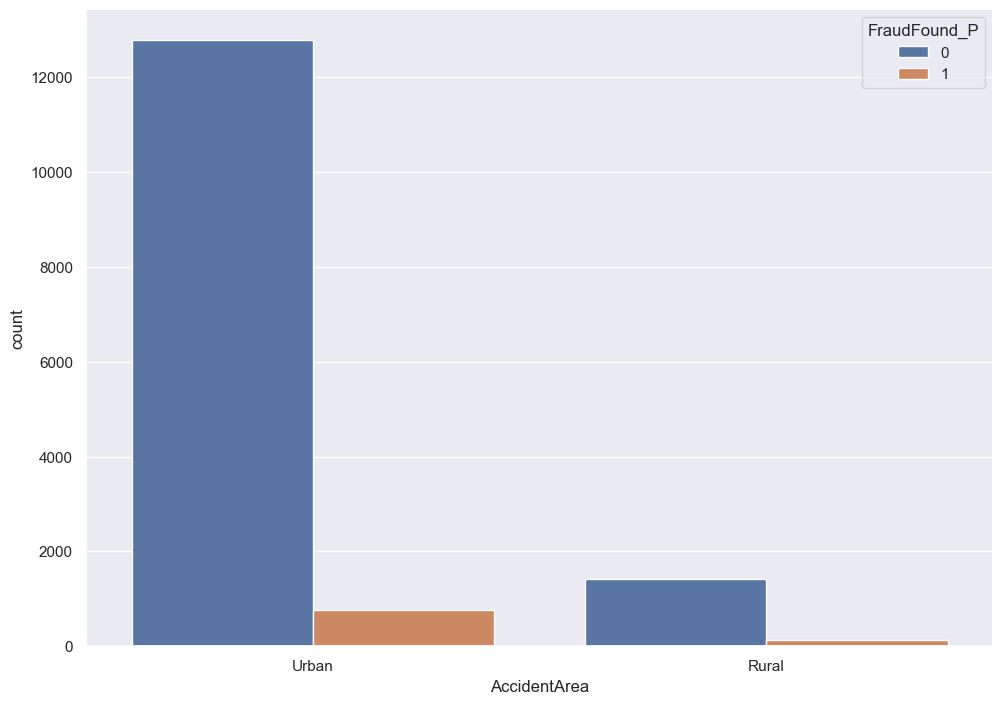

In [176]:
sns.countplot(data=fraud_data_cleaned, x='AccidentArea', hue='FraudFound_P')

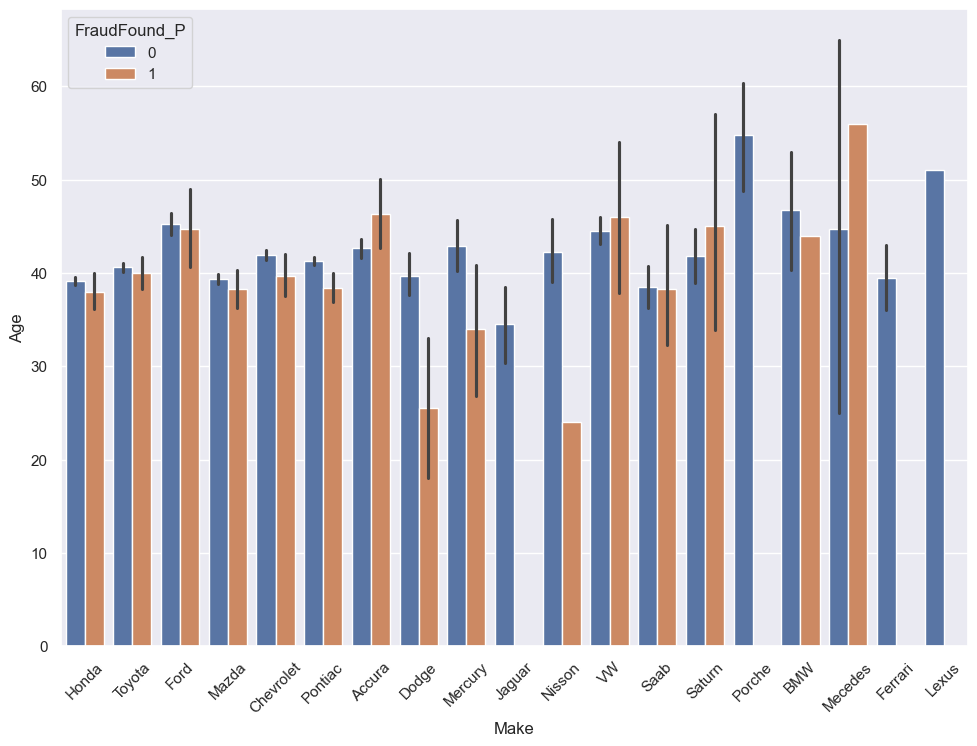

In [177]:
make_age = sns.barplot(data=fraud_data_cleaned, x="Make", y="Age", hue="FraudFound_P")
make_age.tick_params(axis='x', labelrotation=45)

In [178]:
fraud_data_cleaned.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Date'],
      dtype='object')

In [179]:
categorical = [
"MonthClaimed",
"Fault",
"PolicyType",
"VehicleCategory",
"Days_Policy_Accident",
"Days_Policy_Claim",
"AgeOfVehicle",
"AgeOfPolicyHolder",
"PoliceReportFiled",
"WitnessPresent",
"AgentType",
"NumberOfSuppliments",
"AddressChange_Claim",
"NumberOfCars",
"BasePolicy"]

numerical = ["WeekOfMonth",
"WeekOfMonthClaimed",
"VehiclePrice",
"Deductible",
"DriverRating"]

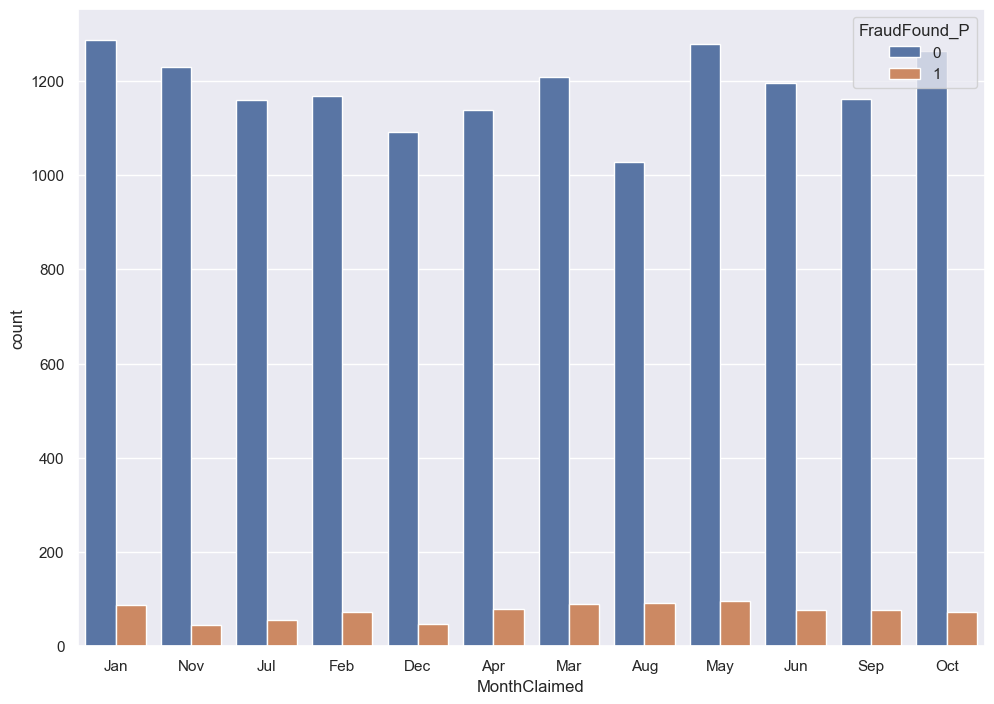

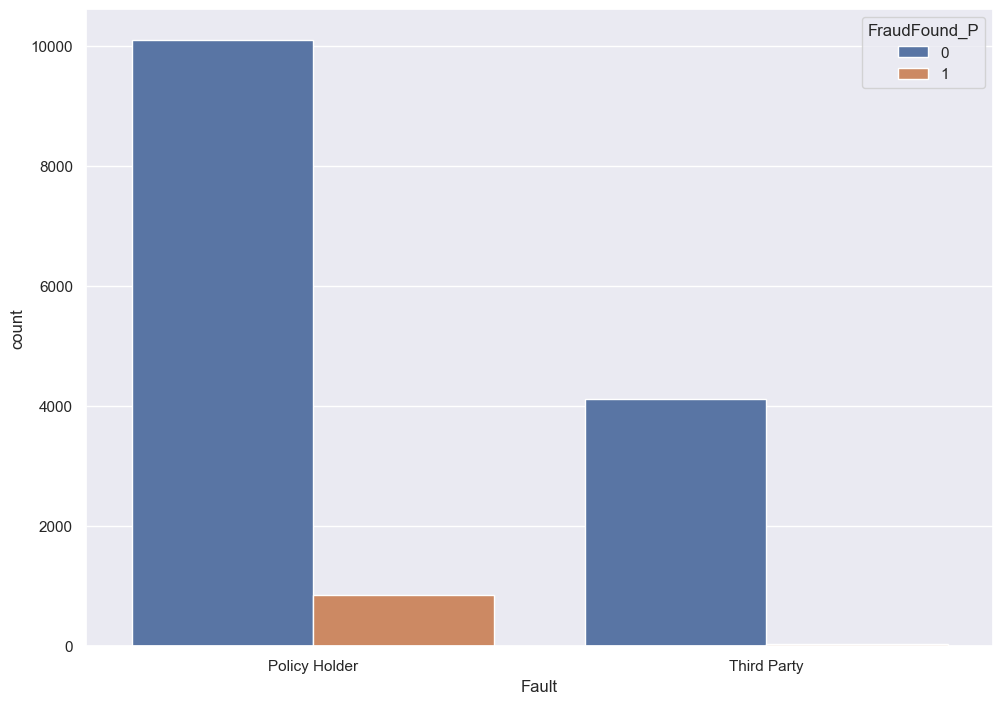

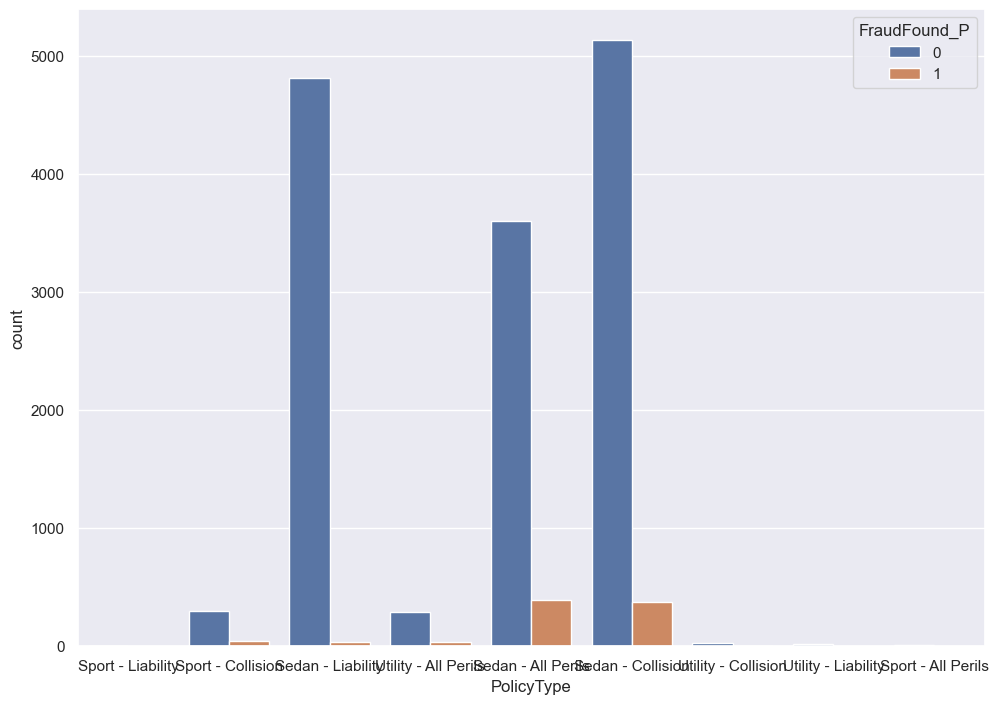

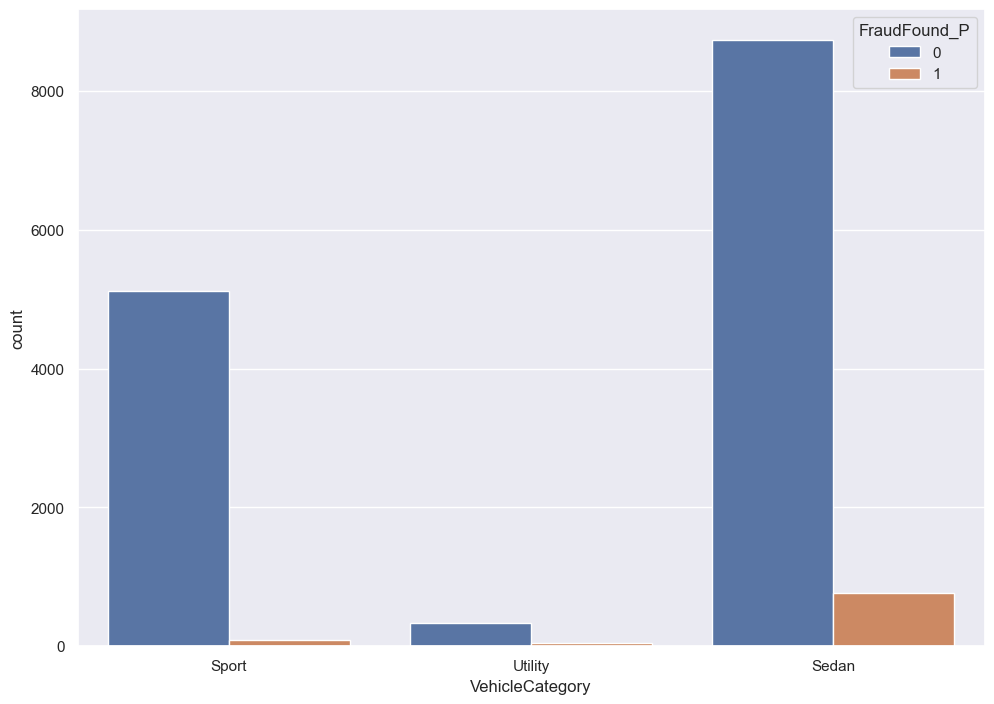

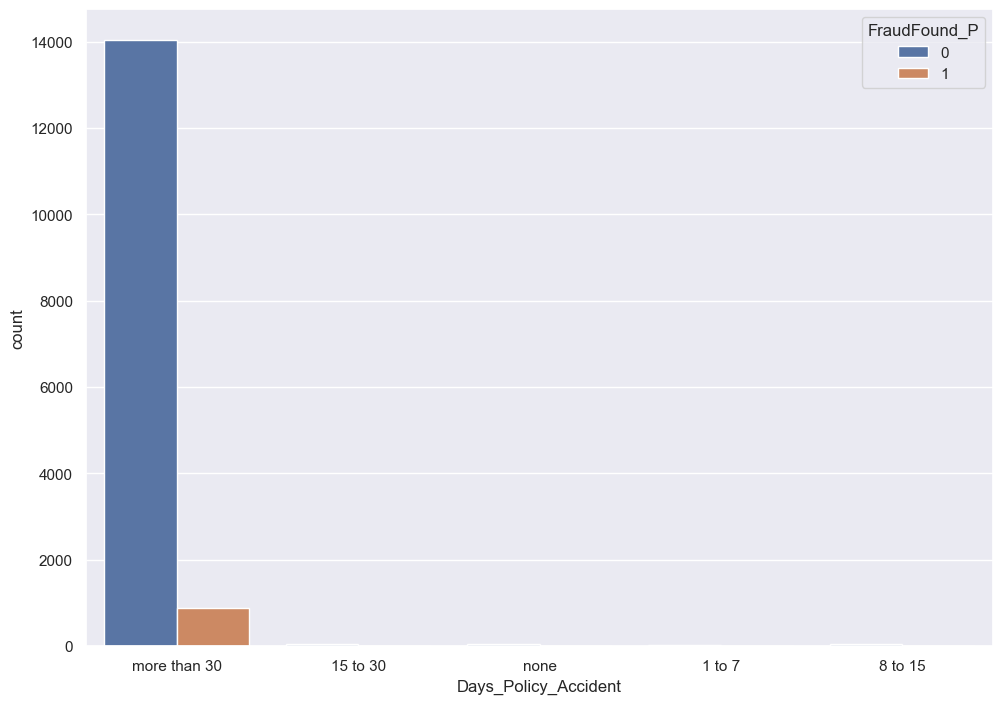

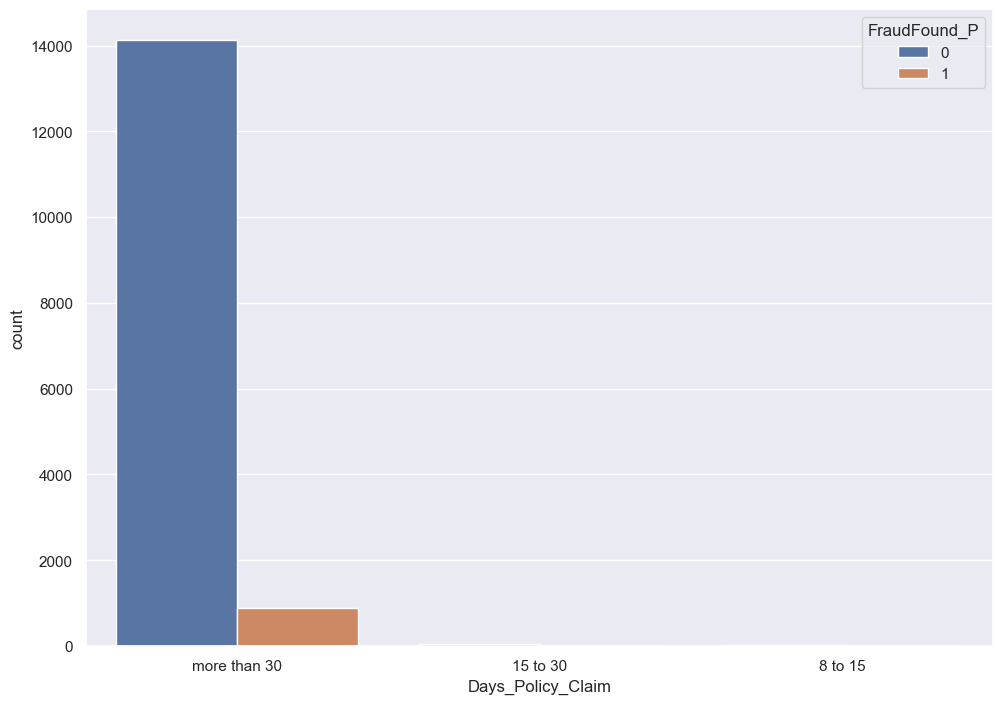

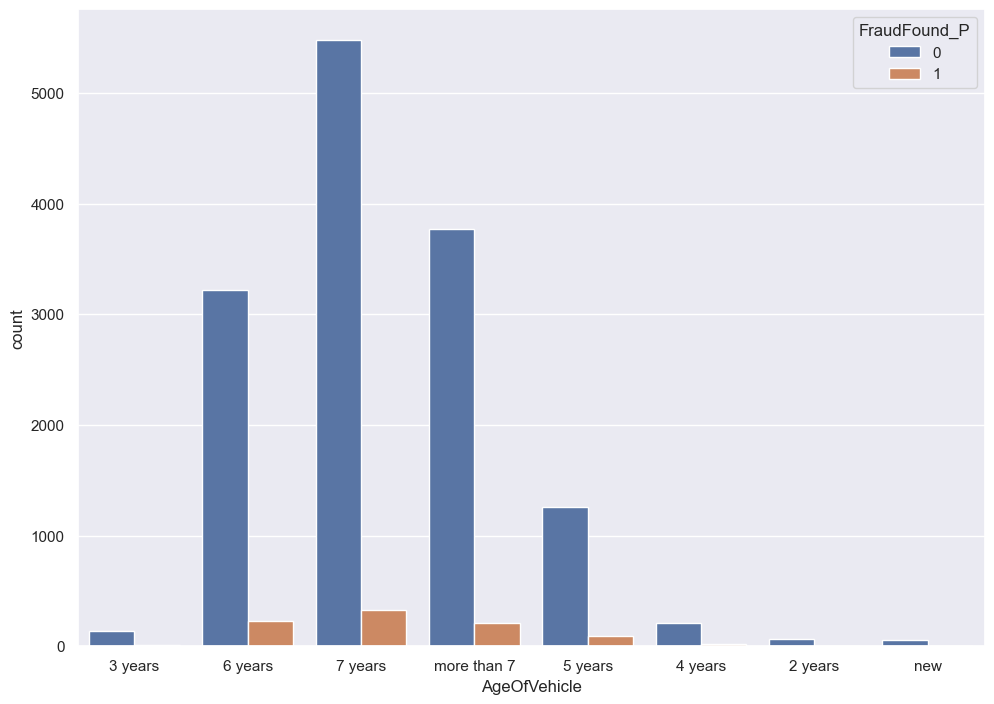

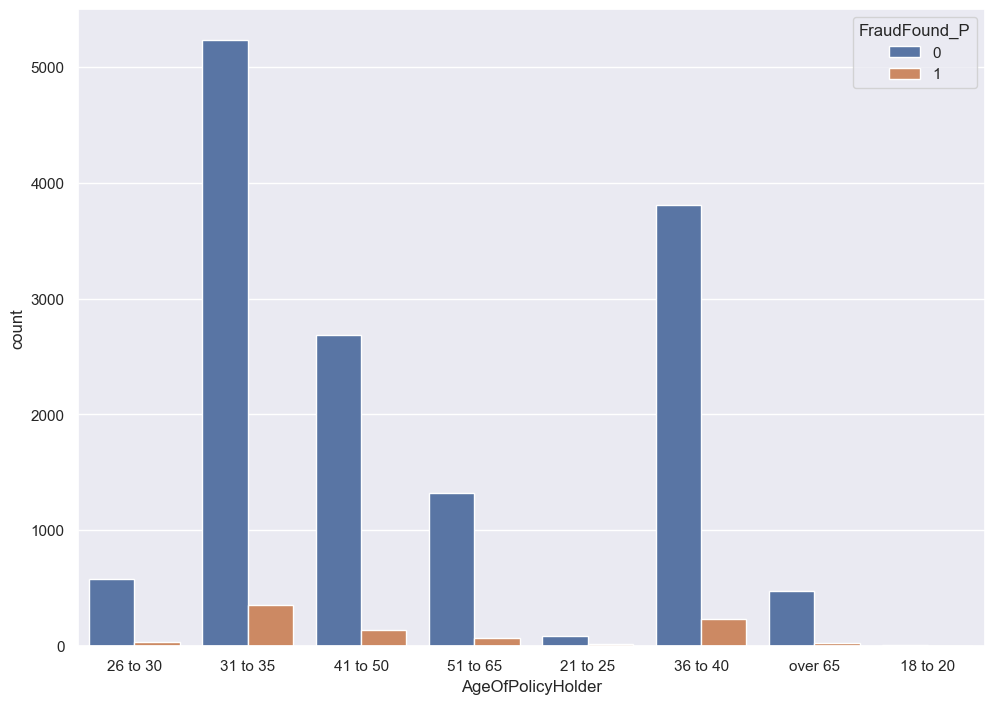

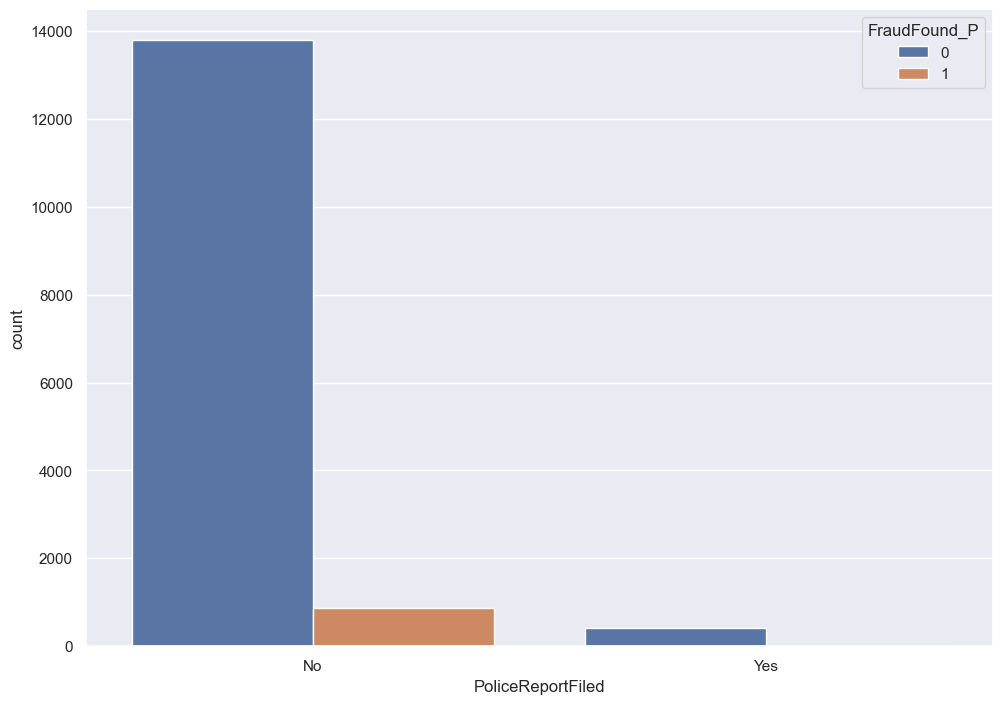

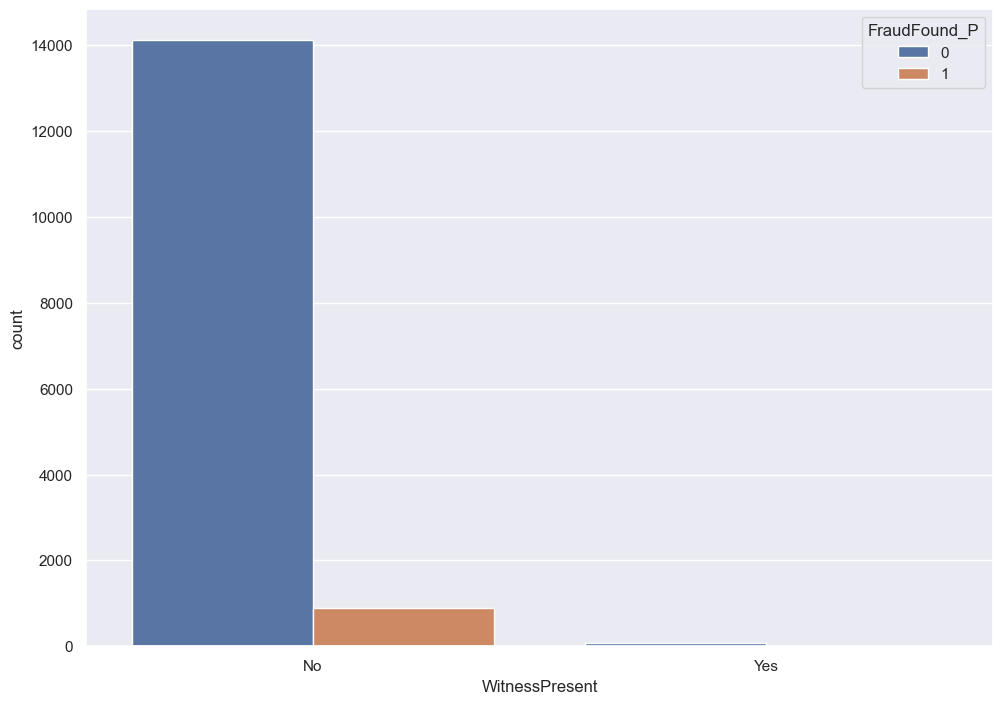

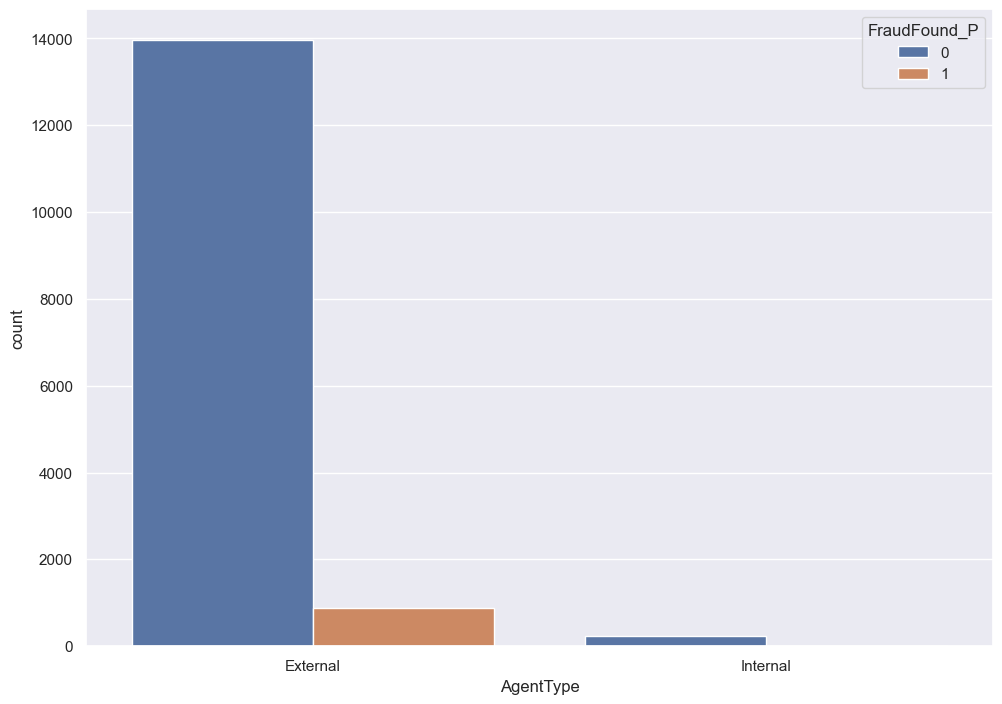

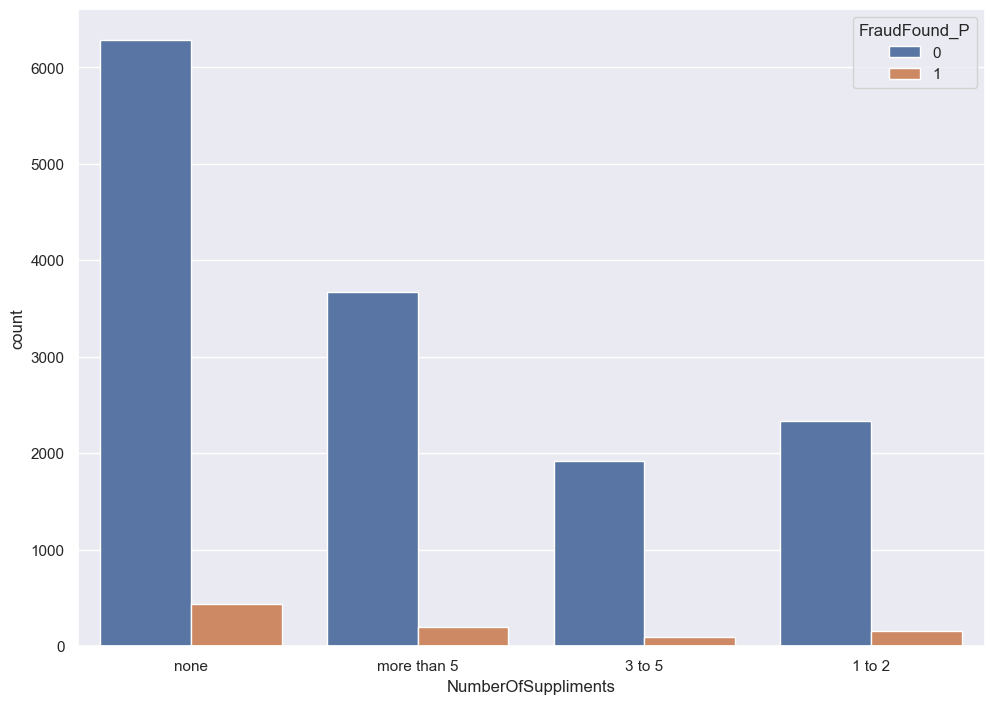

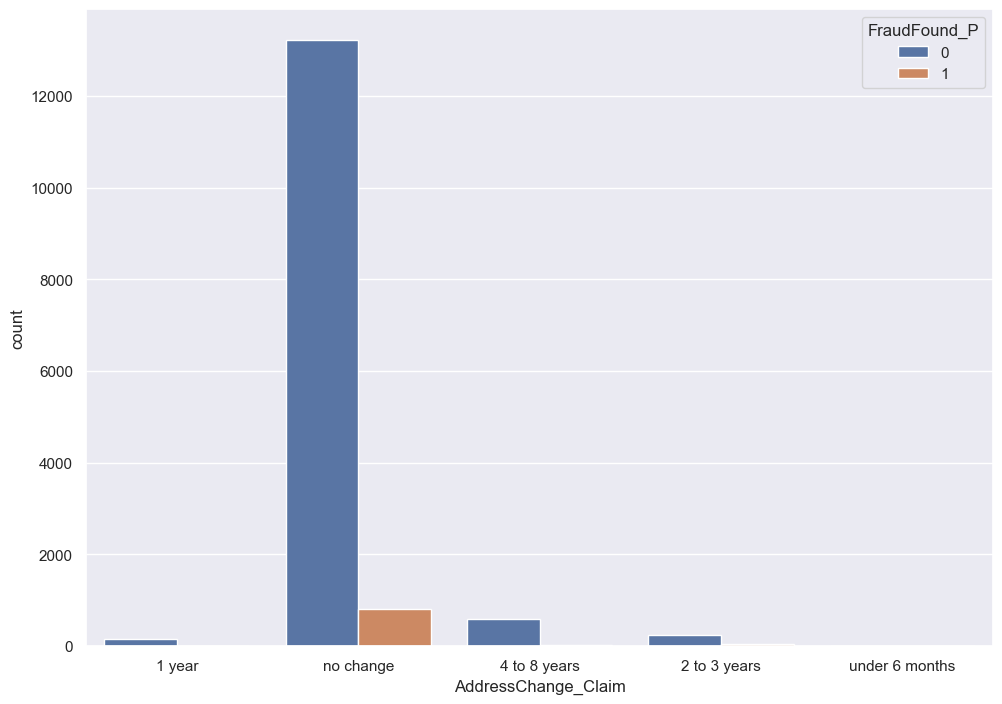

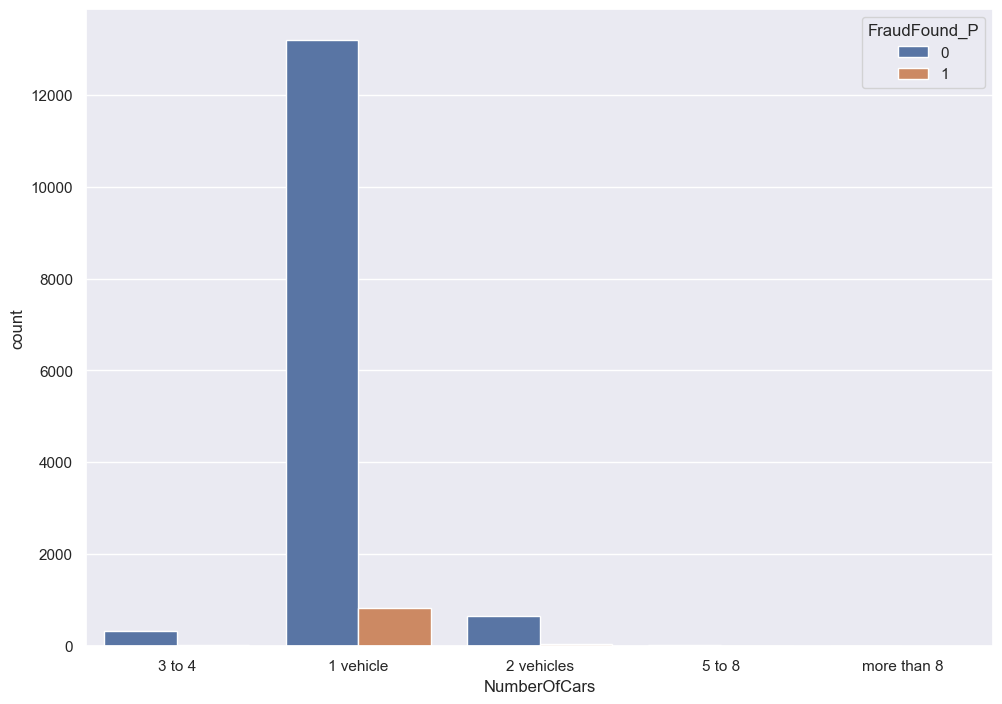

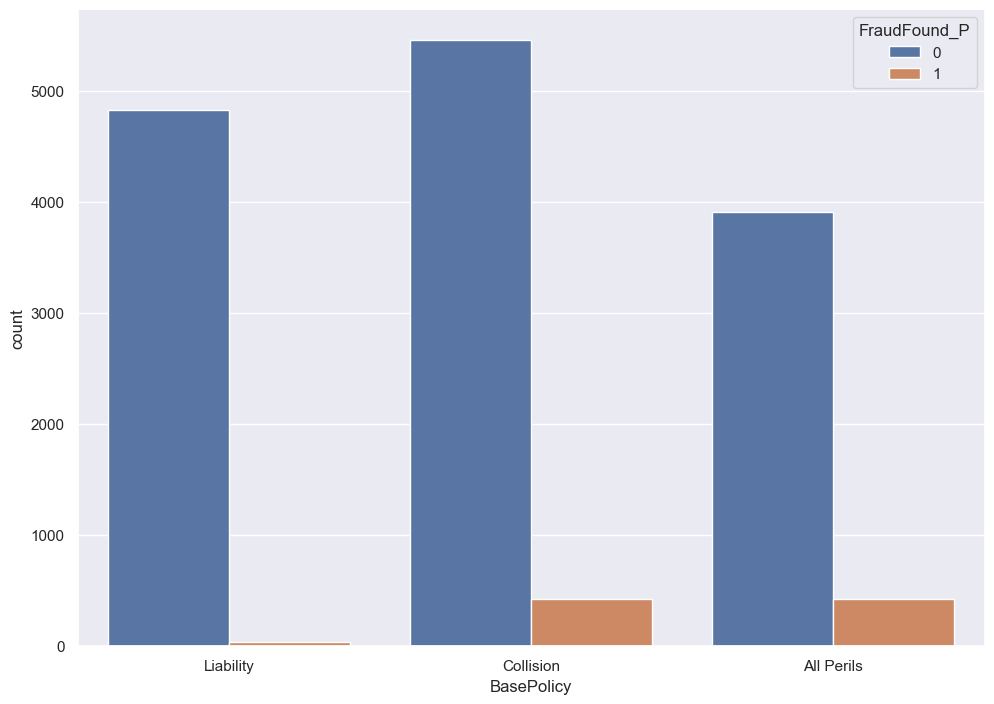

In [180]:
import matplotlib.pyplot as plt
for i in categorical:
    plt.figure()
    sns.countplot(data=fraud_data_cleaned, x=i, hue="FraudFound_P")
    

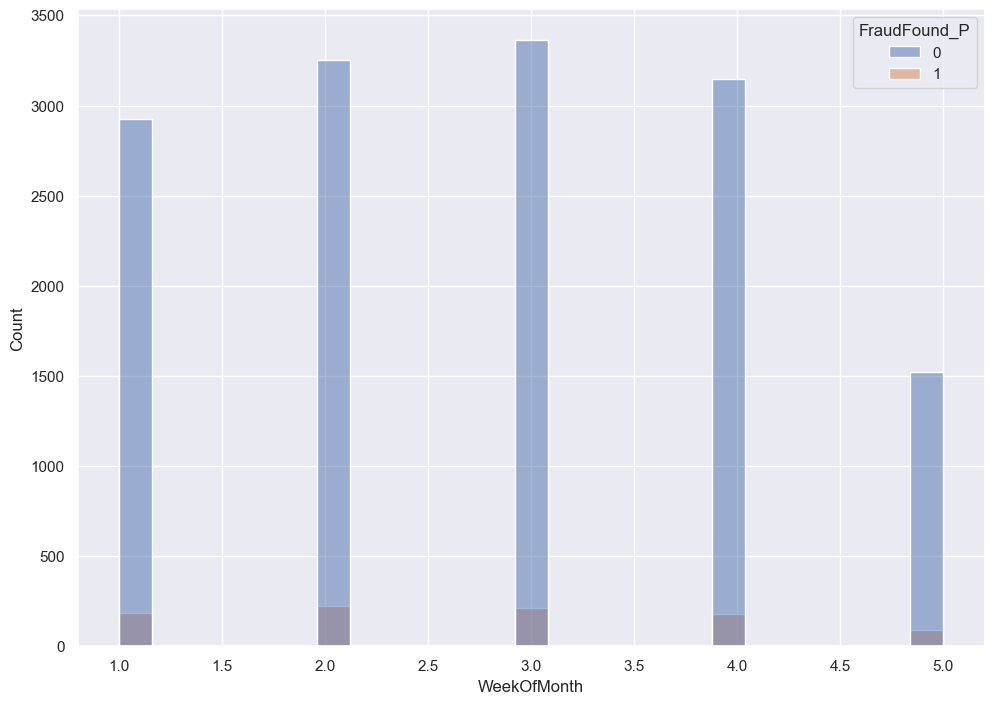

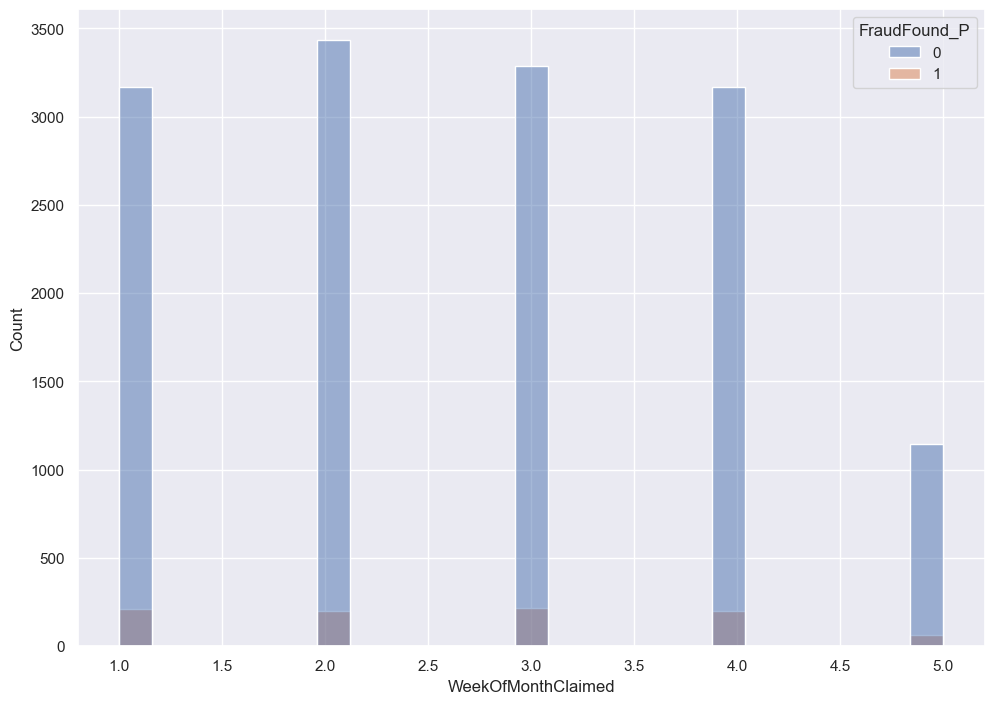

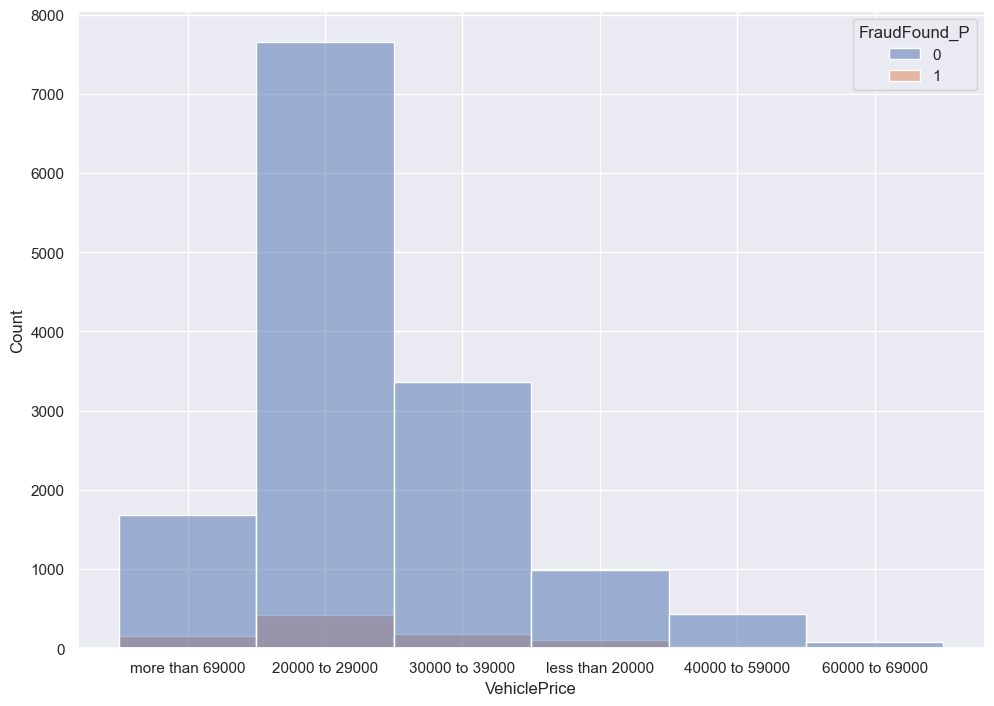

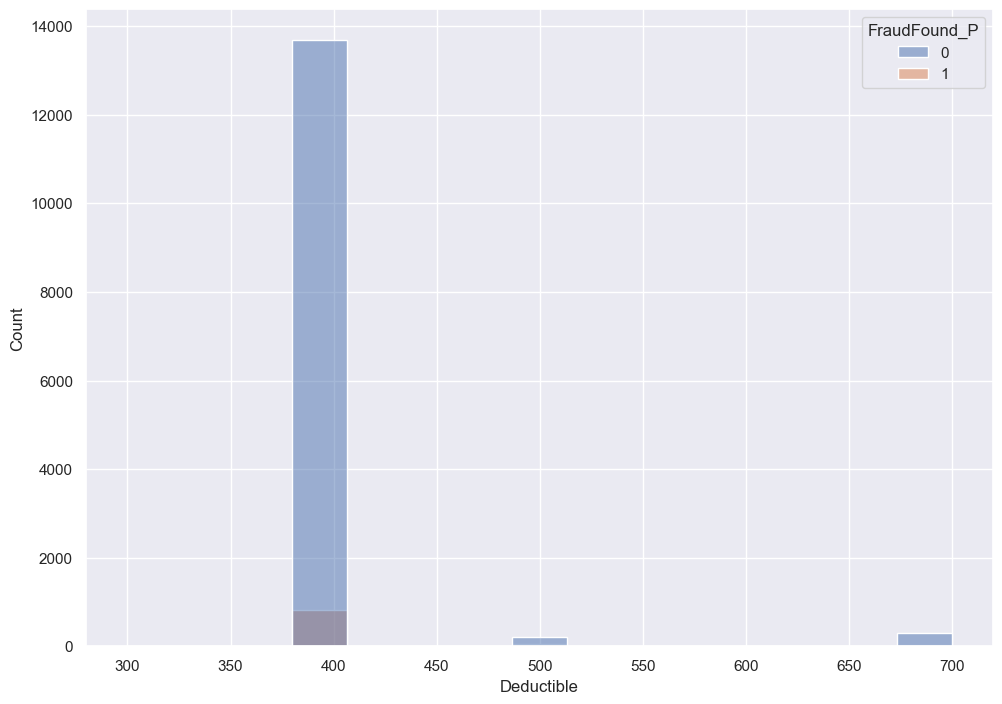

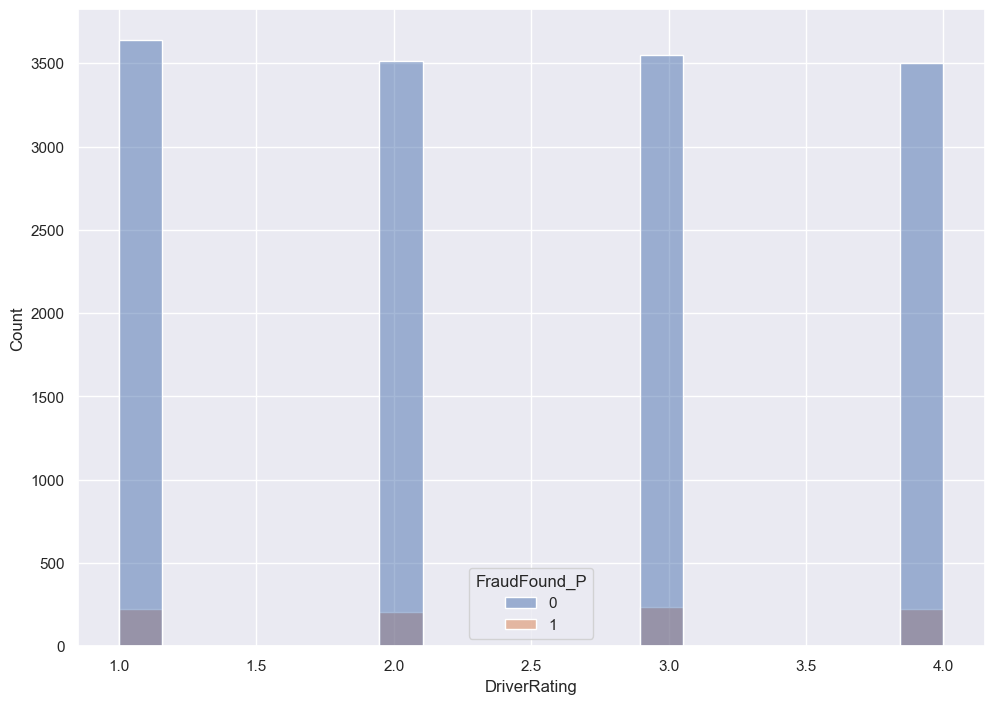

In [181]:
import matplotlib.pyplot as plt
for i in numerical:
    plt.figure()
    sns.histplot(data=fraud_data_cleaned, x=i, hue="FraudFound_P")

<Axes: xlabel='Sex', ylabel='count'>

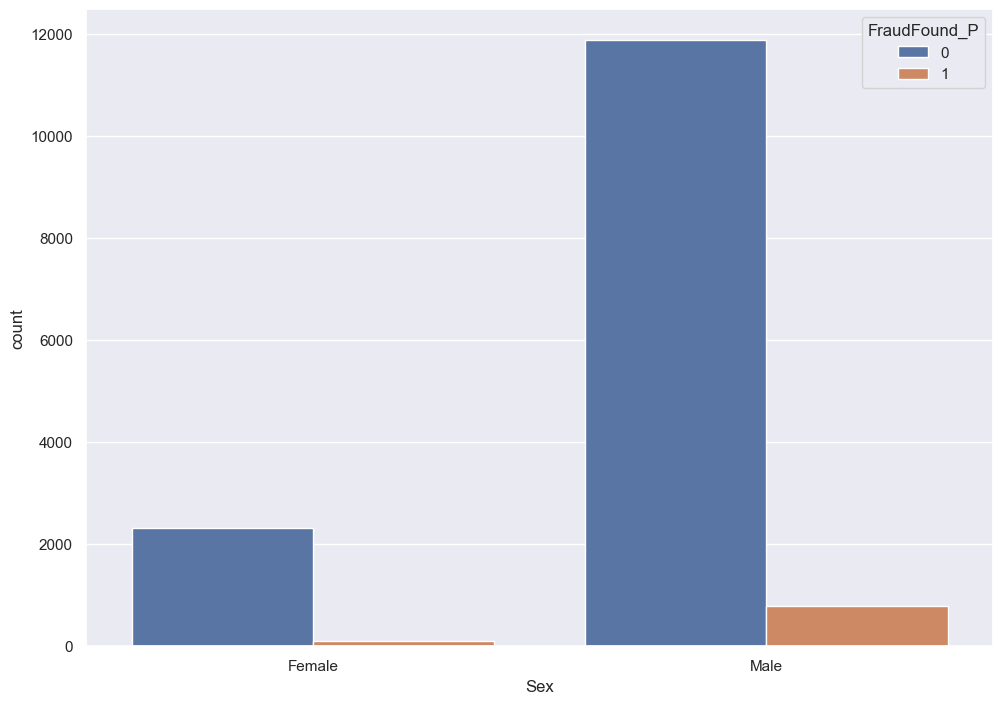

In [182]:
sns.countplot(data=fraud_data_cleaned, x="Sex", hue="FraudFound_P")

<Axes: xlabel='MaritalStatus', ylabel='count'>

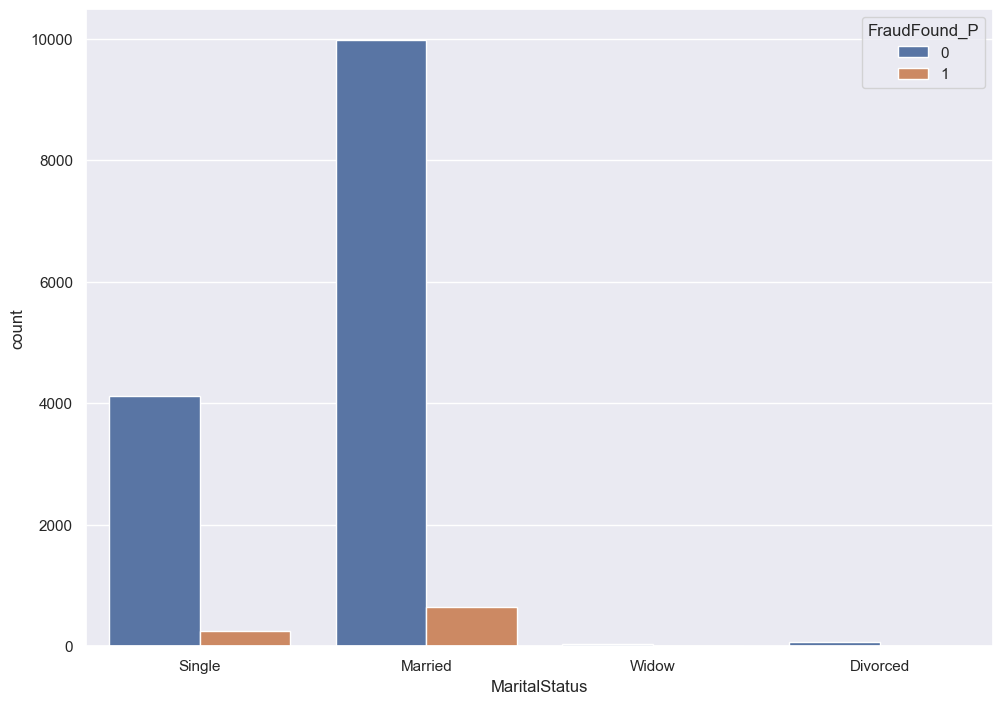

In [183]:
sns.countplot(data=fraud_data_cleaned, x="MaritalStatus", hue="FraudFound_P")

<Axes: xlabel='PastNumberOfClaims', ylabel='count'>

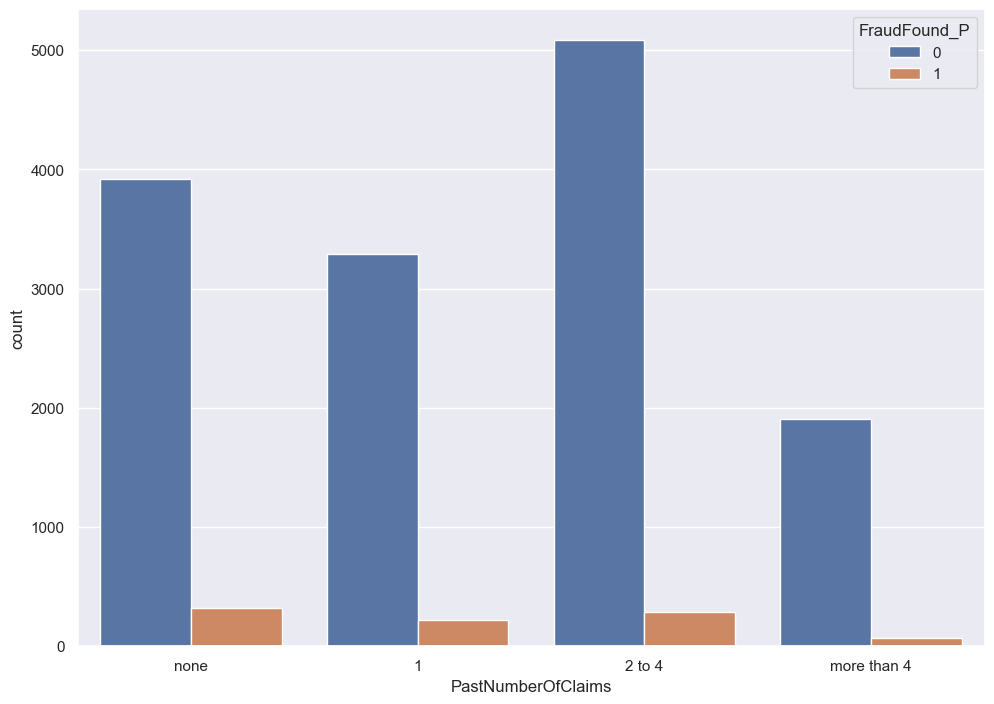

In [184]:
sns.countplot(data=fraud_data_cleaned, x="PastNumberOfClaims", hue="FraudFound_P")

<Axes: xlabel='Age', ylabel='Count'>

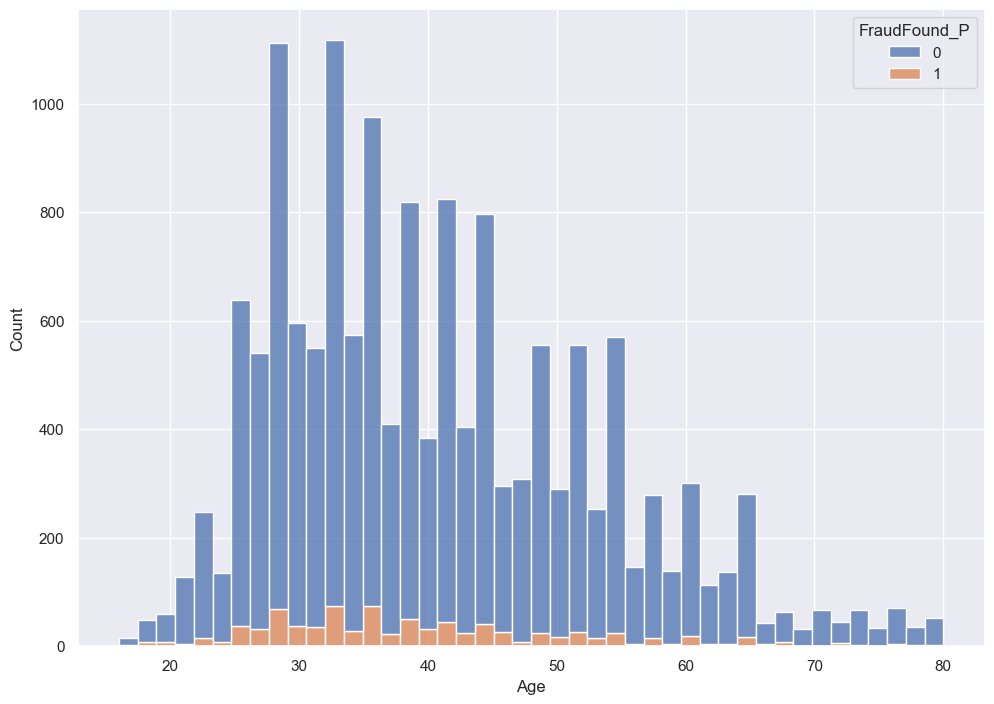

In [185]:
sns.histplot(data=fraud_data_cleaned, x="Age", hue="FraudFound_P", multiple="stack")

In [186]:
claims_per_month = fraud_data_cleaned.groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()
fraud_claims_per_month = fraudulent_claims.groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()

In [187]:
monthly_claims_plot = pd.DataFrame({"Num Claims per Month": claims_per_month, "Num Fraudulent Claims per Month": fraud_claims_per_month})

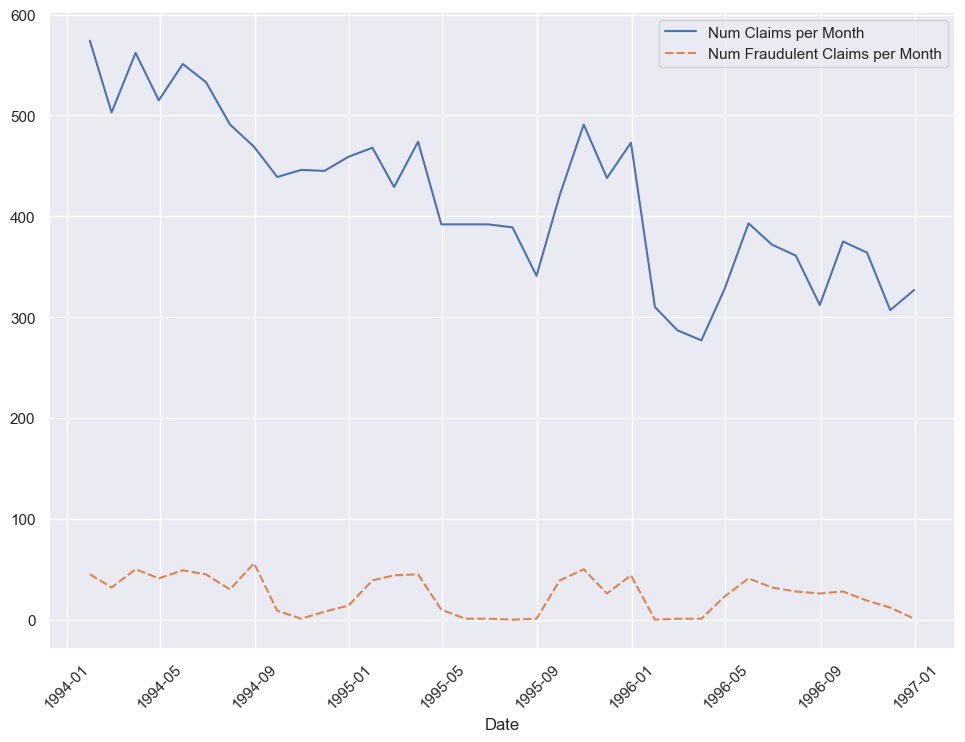

In [188]:
import matplotlib.pyplot as plt
monthly_claims = sns.lineplot(data=monthly_claims_plot)
monthly_claims.tick_params(axis='x', labelrotation=45)

<Axes: xlabel='FraudFound_P', ylabel='Age'>

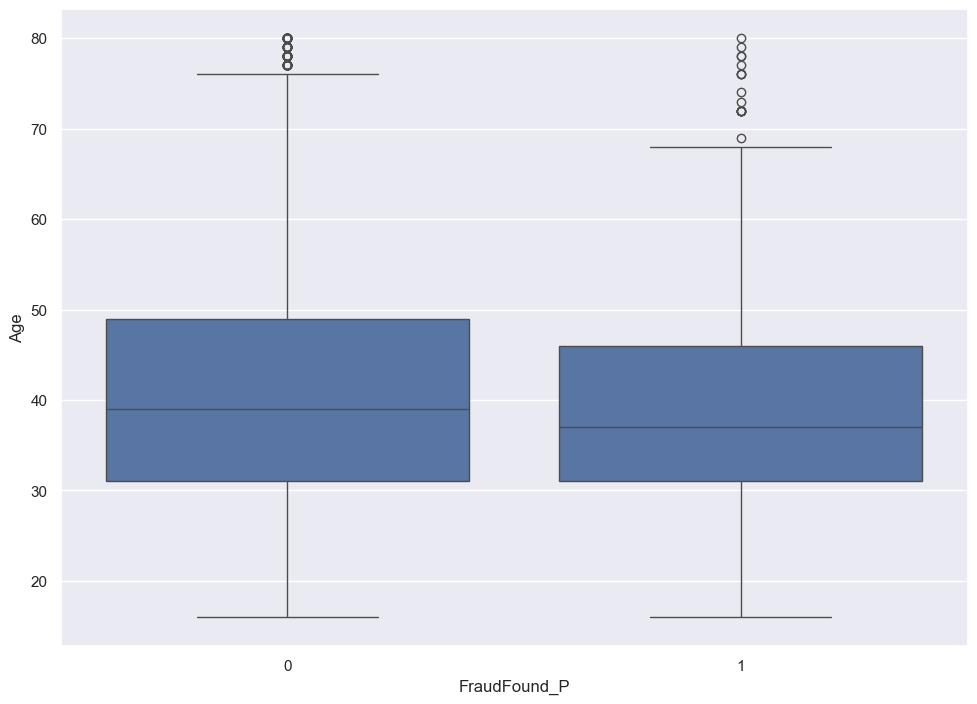

In [189]:
sns.boxplot(data=fraud_data_cleaned, x='FraudFound_P', y="Age")

<Axes: xlabel='FraudFound_P', ylabel='DriverRating'>

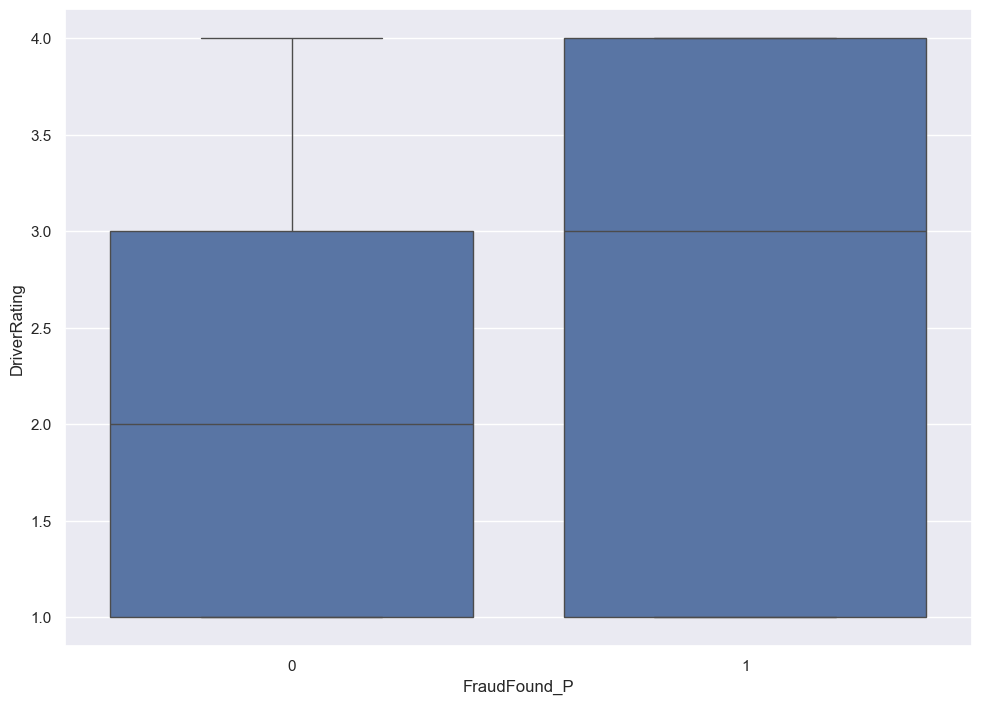

In [190]:
sns.boxplot(data=fraud_data, x='FraudFound_P', y="DriverRating")

<Axes: xlabel='DayOfWeek', ylabel='count'>

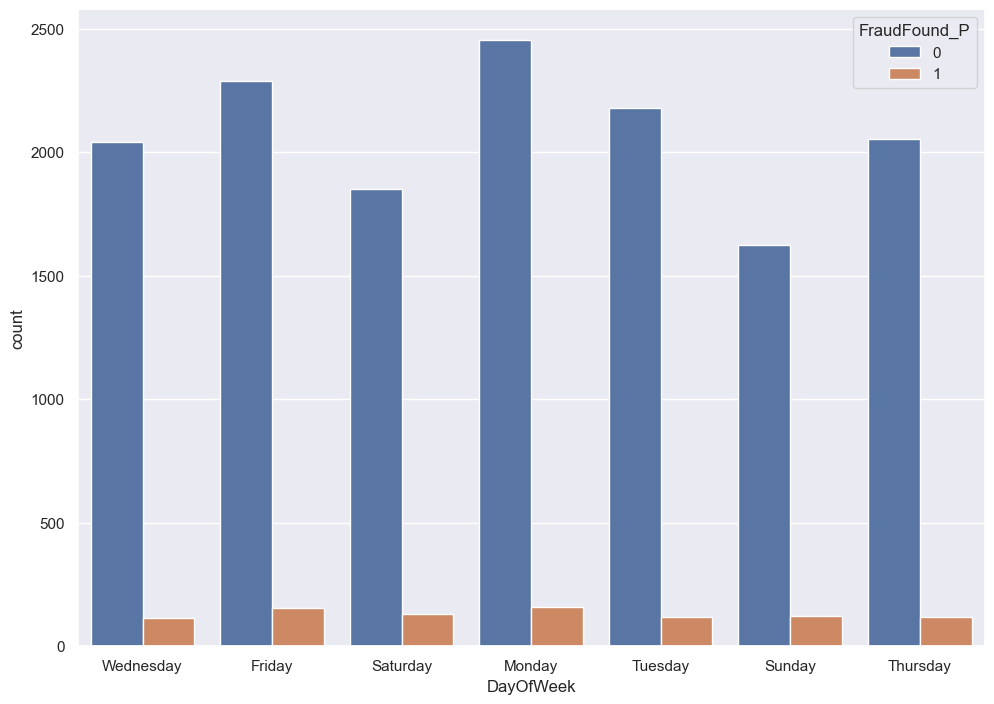

In [191]:
sns.countplot(data=fraud_data, x='DayOfWeek', hue="FraudFound_P")

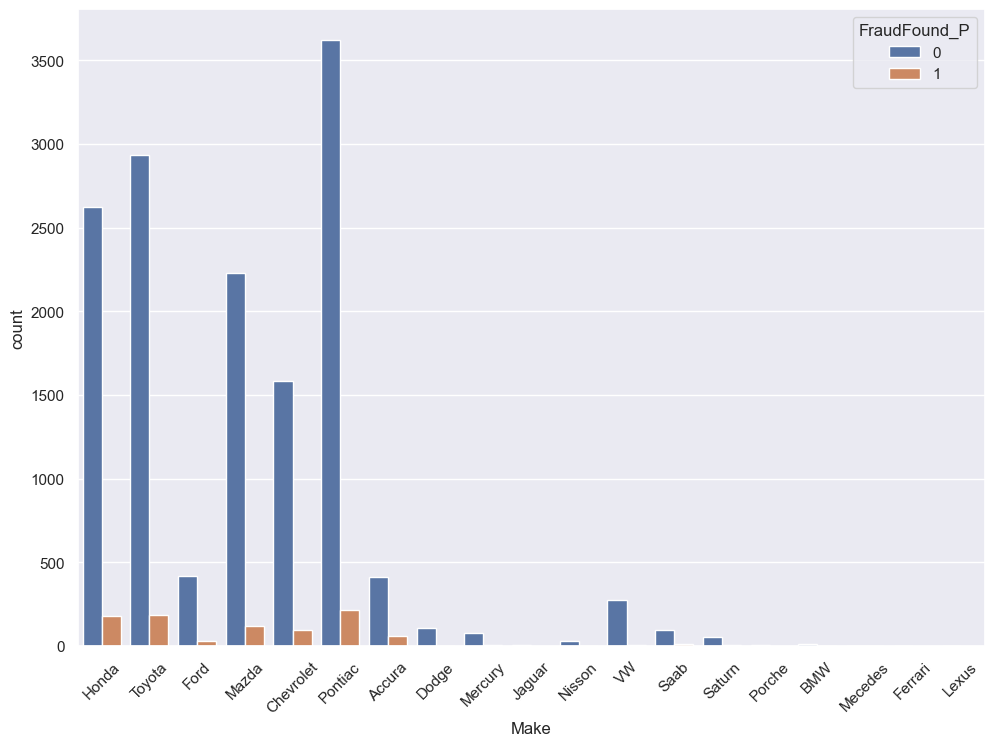

In [192]:
make_plot = sns.countplot(data=fraud_data, x='Make', hue="FraudFound_P")
make_plot.tick_params(axis='x', labelrotation=45)

In [193]:
fraud_data_cleaned_trimmed = fraud_data_cleaned.loc[:, ["WeekOfMonthClaimed", "Age", "FraudFound_P", "RepNumber", "Deductible", "DriverRating", "Year", "PolicyNumber"]]

<Axes: >

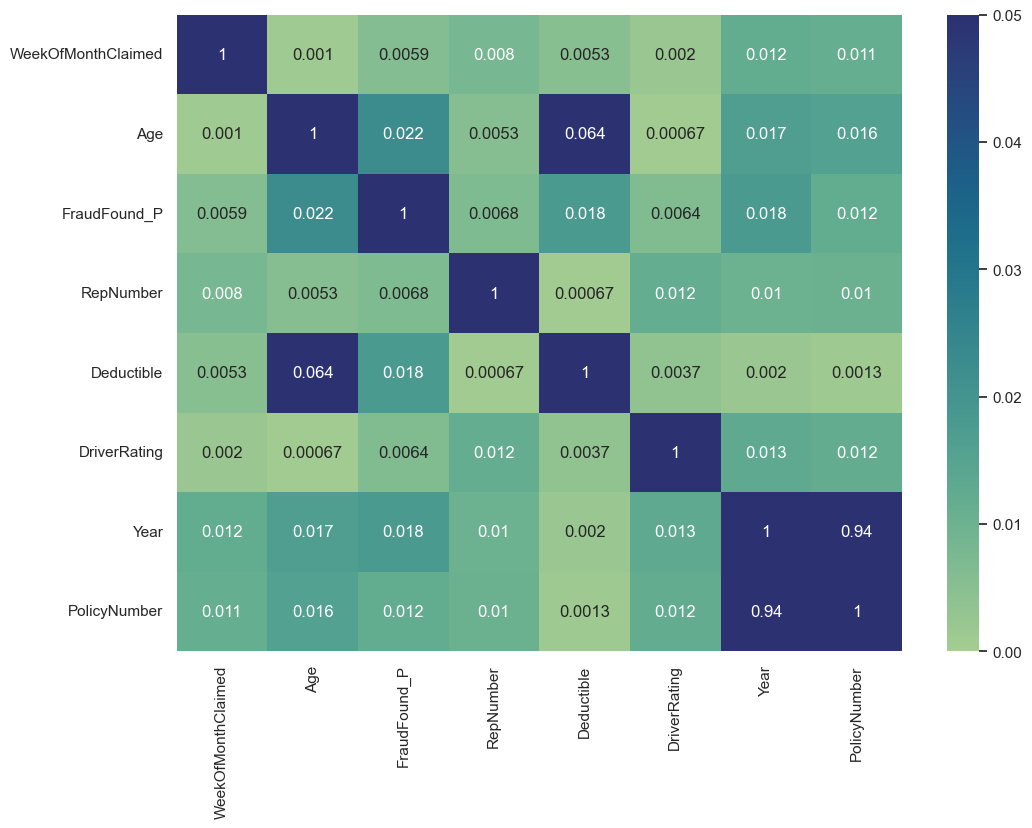

In [194]:
sns.heatmap(np.abs(fraud_data_cleaned_trimmed.corr()), cmap="crest", annot=True, vmin=0, vmax=0.05)

# Data Cleansing

Data was next cleaned and features were selected to be used in machine learning models.

In [195]:
# Select and categorize features to be used in model

nominal = [
"MonthClaimed",
"Month",
"Fault",
"PolicyType",
"VehicleCategory",
"PoliceReportFiled",
"WitnessPresent",
"AgentType",
"AddressChange_Claim",
"BasePolicy",
'AccidentArea',
'Make'
]

ordinal = [
"Days_Policy_Accident",
"Days_Policy_Claim",
"AgeOfVehicle",
"NumberOfSuppliments",
"NumberOfCars",
"VehiclePrice",
]

numerical = ["WeekOfMonth",
"WeekOfMonthClaimed",
"DriverRating",
"Age",
"PolicyNumber"]

my_data = fraud_data_cleaned.loc[:,nominal+ordinal+numerical+["FraudFound_P"]]

In [196]:
from sklearn.preprocessing import OneHotEncoder

# Convert categorical nominal data to numerical data

nominal_columns = nominal
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoded_data = encoder.fit_transform(my_data[nominal_columns])

In [197]:
model_data_encoded = pd.concat([my_data, one_hot_encoded_data], axis=1).drop(columns=nominal_columns)

In [198]:
# Convert categorical ordinal data to numerical data

Days_Policy_Accident_cat = ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30']
Days_Policy_Claim_cat = ['8 to 15', '15 to 30', 'more than 30']
AgeOfVehicle_cat = ["new", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "more than 7"]
NumberOfSuppliments_cat = ['none', '1 to 2', '3 to 5', 'more than 5']
NumberOfCars_cat = ["1 vehicle", "2 vehicles", "3 to 4", "5 to 8", "more than 8"]
VehiclePrice_cat = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000']

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories = [Days_Policy_Accident_cat, Days_Policy_Claim_cat, AgeOfVehicle_cat, NumberOfSuppliments_cat, NumberOfCars_cat, VehiclePrice_cat])
model_data_encoded[ordinal] = ord_enc.fit_transform(model_data_encoded[ordinal])

In [199]:
from sklearn.preprocessing import OneHotEncoder

# Convert categorical nominal data to numerical data

nominal_columns = nominal
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoded_data = encoder.fit_transform(my_data[nominal_columns])

# Models

## Logistic Regression

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve
X_lg = model_data_encoded. loc[:, model_data_encoded.columns != "FraudFound_P"].values
y_lg = model_data_encoded["FraudFound_P"].values
#Split data into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X_lg, y_lg, test_size=0.25, random_state=10)

In [201]:
model_data_encoded

,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,NumberOfSuppliments,NumberOfCars,VehiclePrice,WeekOfMonth,WeekOfMonthClaimed,DriverRating,Age,...,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW
0,4.0,2.0,2.0,0.0,2.0,5.0,5,1,1,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,2.0,5.0,0.0,0.0,5.0,3,4,4,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,2.0,6.0,0.0,0.0,5.0,5,2,3,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2.0,7.0,3.0,0.0,1.0,2,1,2,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,2.0,4.0,0.0,0.0,5.0,5,2,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4.0,2.0,5.0,0.0,0.0,1.0,4,5,4,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15416,4.0,2.0,5.0,3.0,2.0,2.0,5,1,3,30,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15417,4.0,2.0,4.0,1.0,0.0,1.0,5,1,4,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15418,4.0,2.0,1.0,3.0,0.0,1.0,1,2,4,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [202]:
model_lg = LogisticRegression(max_iter=100, penalty='l1', solver='liblinear', class_weight='balanced') 
model_lg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [203]:
y_pred_proba = model_lg.predict_proba(X_test)[:, 1]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


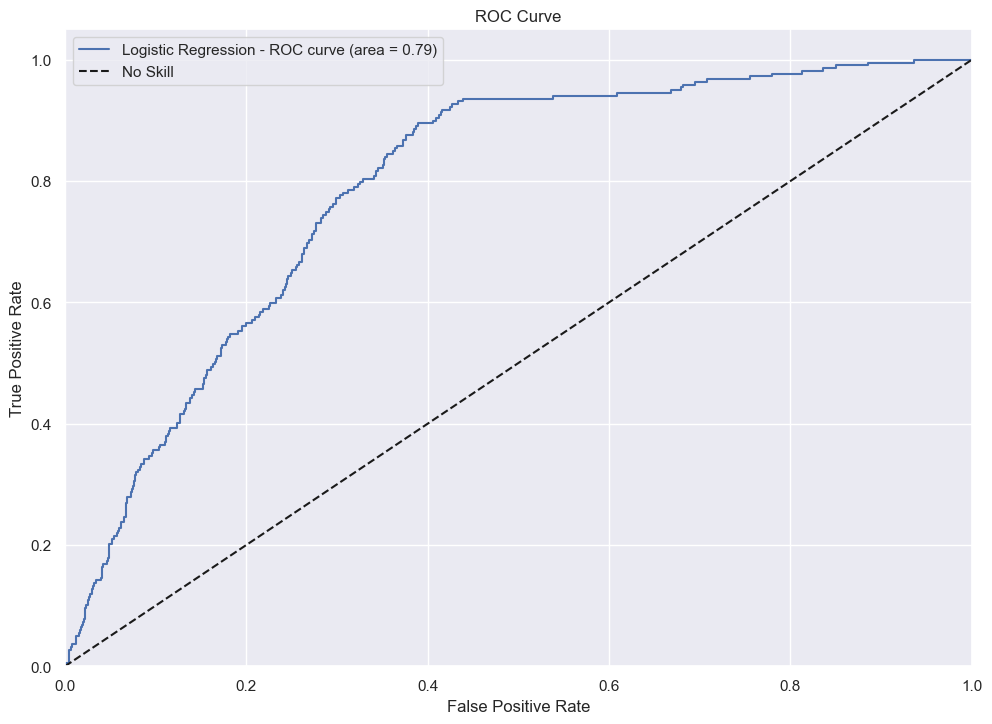

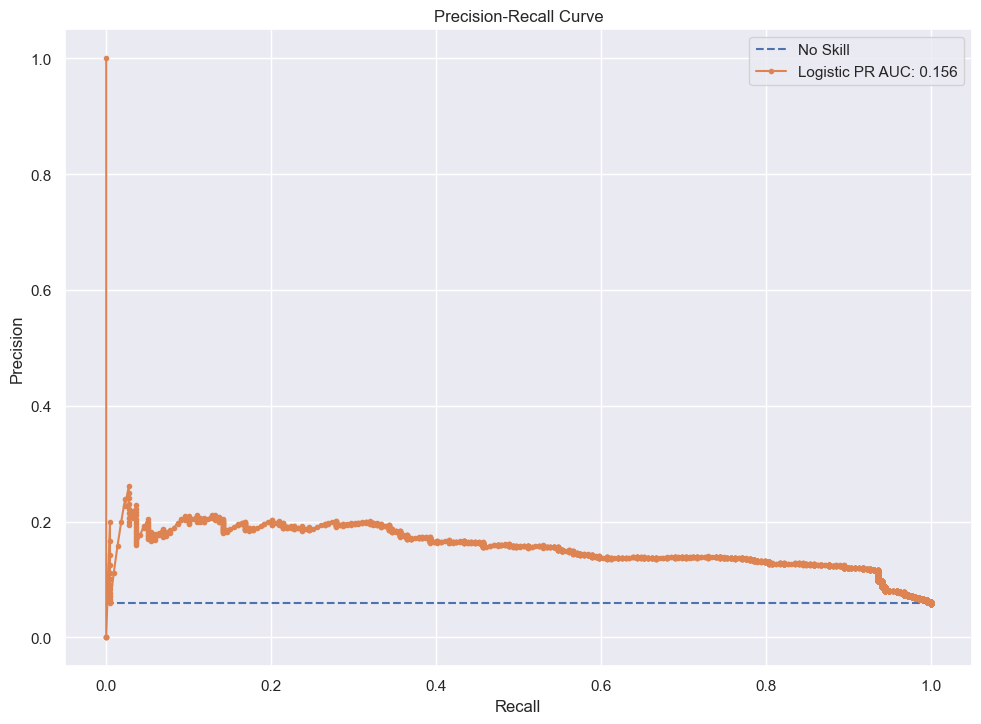

In [204]:
max_iter_list = [1]
for i in max_iter_list:
    model_lg = LogisticRegression(max_iter=i, penalty='l1', solver='liblinear', class_weight='balanced') 
    model_lg.fit(X_train, y_train)
    y_pred_proba = model_lg.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
    lg_roc_auc = auc(fpr, tpr)
    plt.figure()  
    plt.plot(fpr, tpr, label='Logistic Regression - ROC curve (area = %0.2f)' % lg_roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(y_lg[y_lg==1]) / len(y_lg)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # calculate model precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    # plot the model precision-recall curve
    lg_auc_score = auc(recall, precision)
    plt.plot(recall, precision, marker='.', label='Logistic PR AUC: %.3f' % lg_auc_score)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    plt.title('Precision-Recall Curve')
    # show the plot
    plt.show()

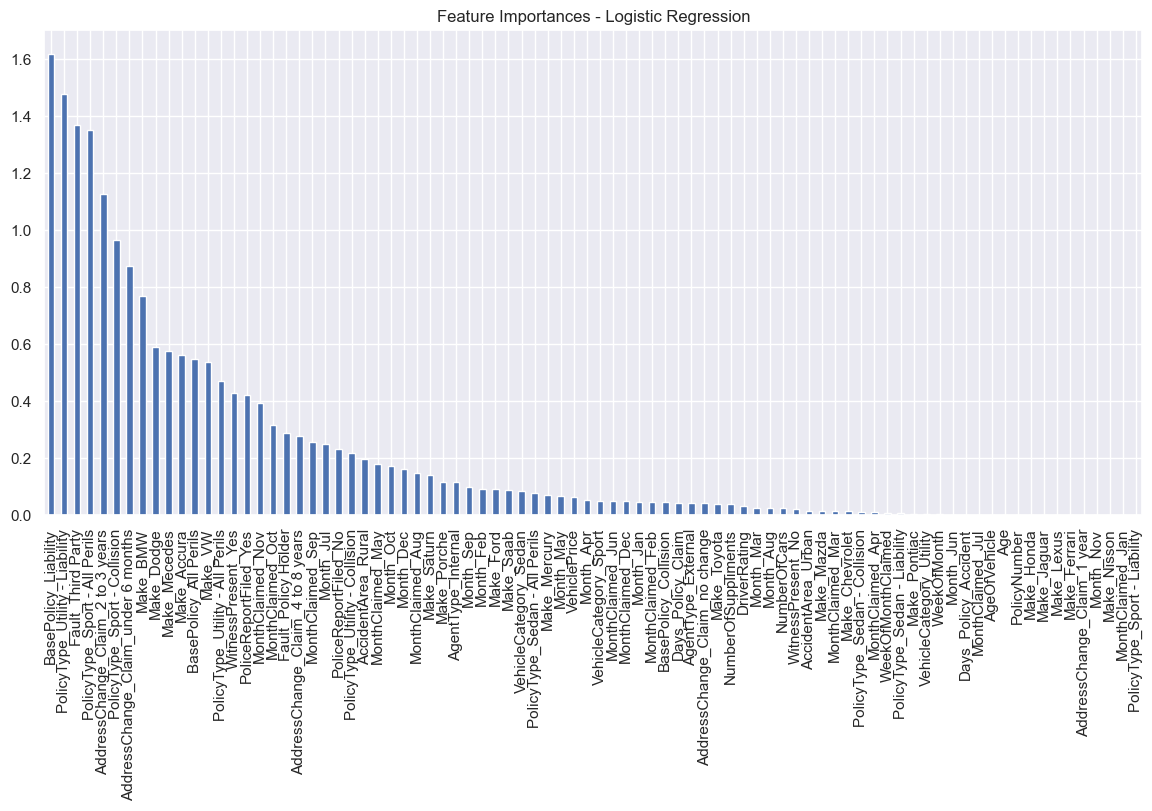

In [205]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

my_features = model_data_encoded. loc[:, model_data_encoded.columns != "FraudFound_P"].columns
importances = model_lg.coef_
avg_importance = np.mean(np.abs(importances), axis=0)
forest_importances = pd.Series(avg_importance, index=my_features).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances - Logistic Regression")
fig.tight_layout()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


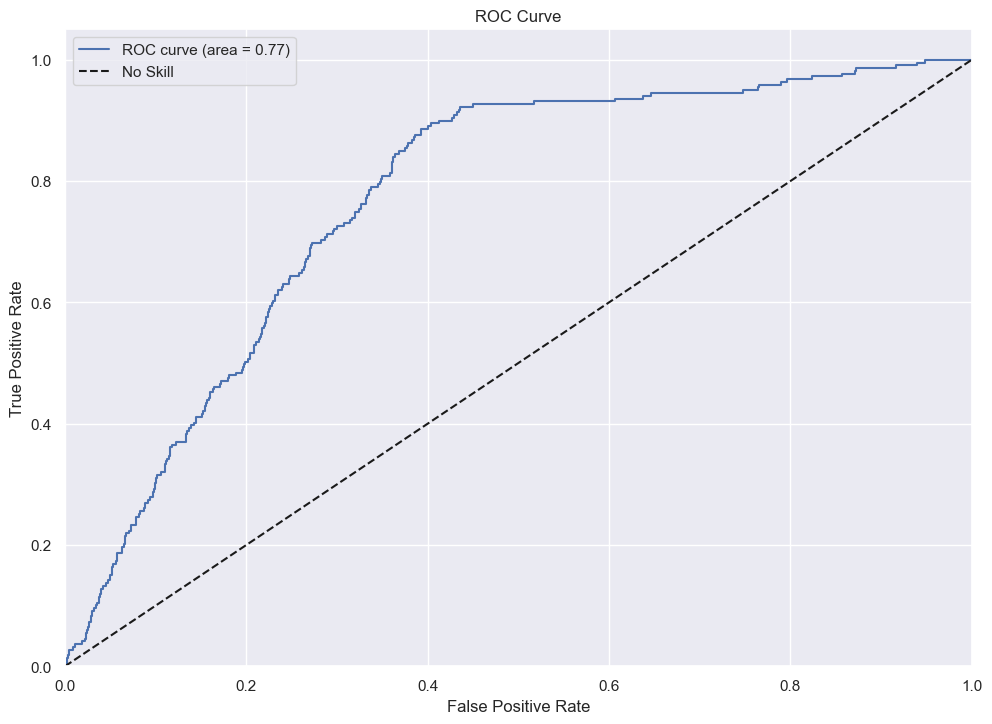

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


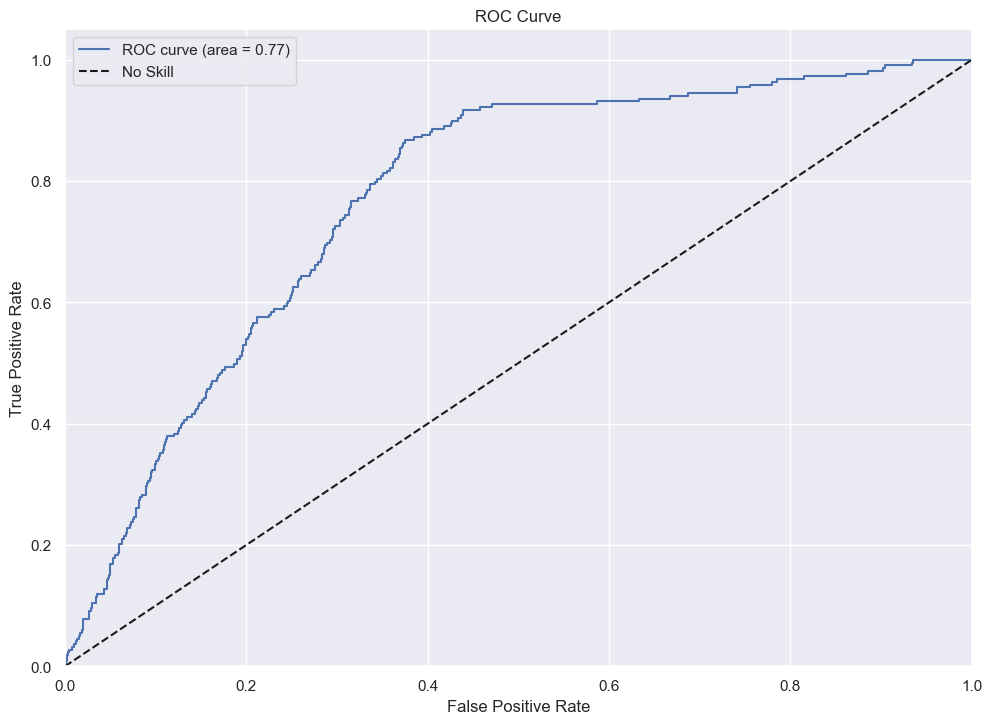

In [206]:
penalty_list = [None, 'l2']
for i in penalty_list:
    model_lg = LogisticRegression(max_iter=100, penalty=i, class_weight='balanced') 
    model_lg.fit(X_train, y_train)
    y_pred_proba = model_lg.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
    roc_auc = auc(fpr, tpr)
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

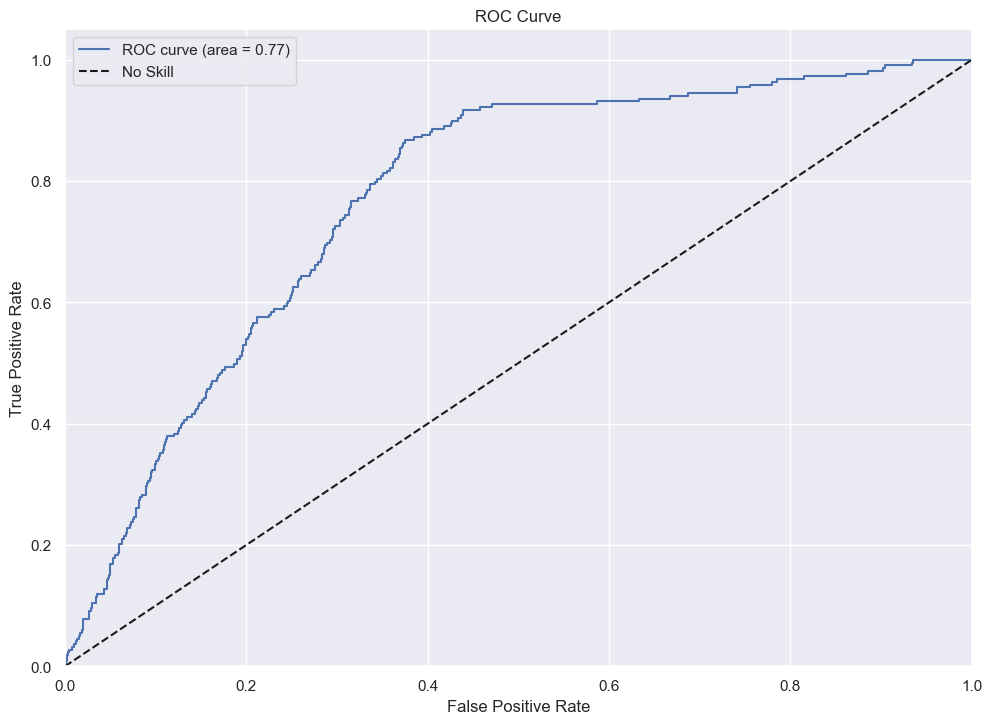

In [207]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


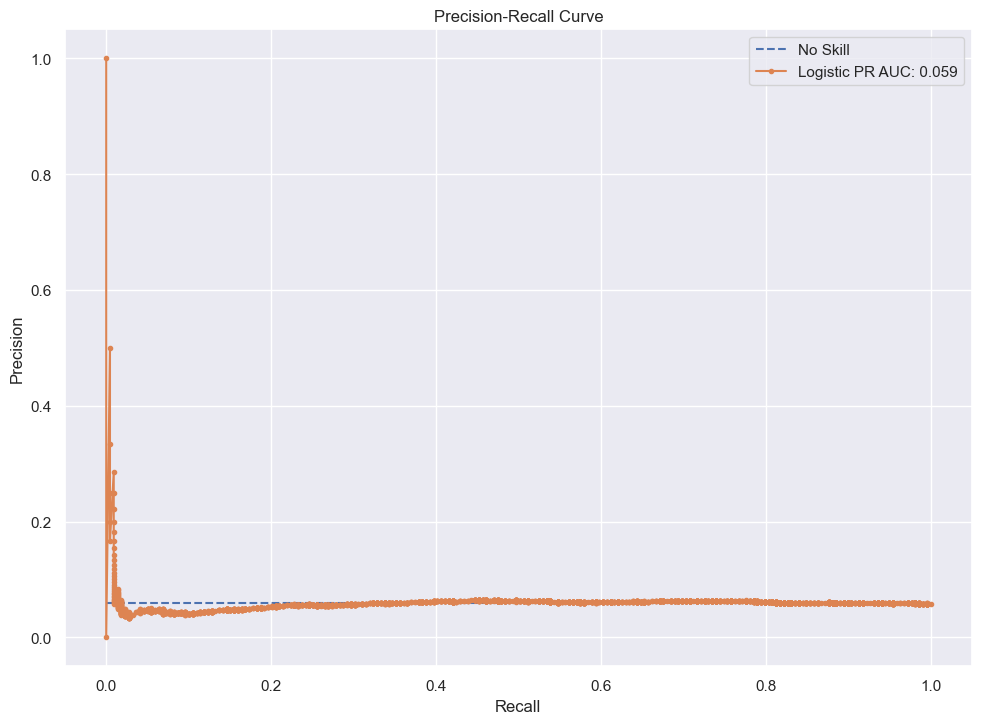

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


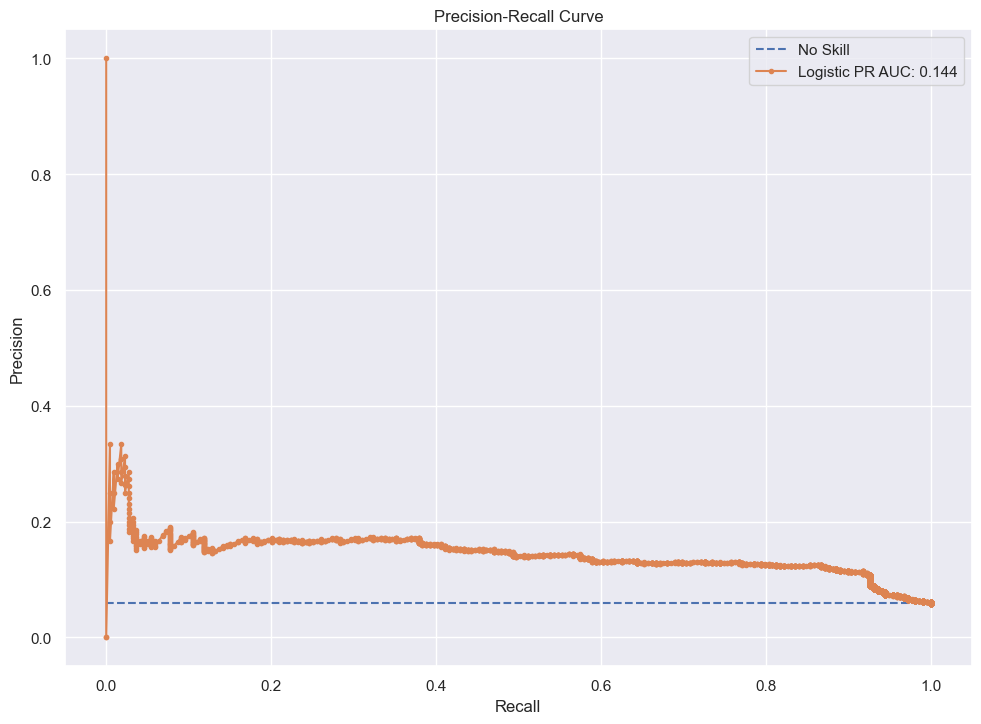

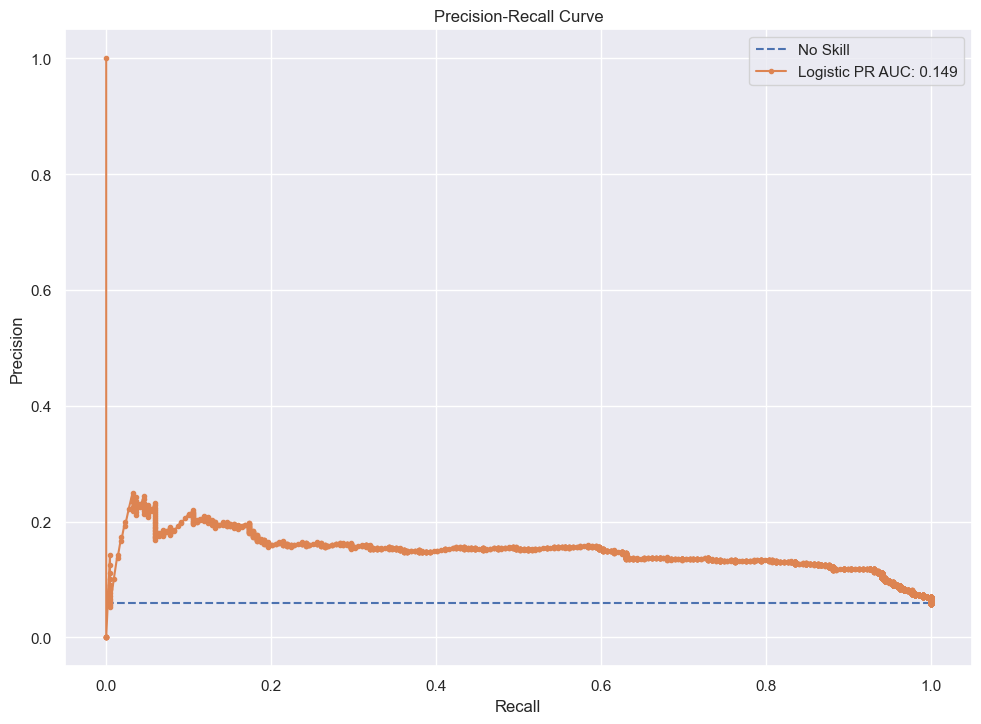

In [208]:
max_iter_list = [10, 100, 1000]
for i in max_iter_list:
    model_lg = LogisticRegression(max_iter=i, penalty='l2', class_weight='balanced') 
    model_lg.fit(X_train, y_train)
    y_pred_proba = model_lg.predict_proba(X_test)[:, 1]
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(y_lg[y_lg==1]) / len(y_lg)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # calculate model precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    # plot the model precision-recall curve
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, marker='.', label='Logistic PR AUC: %.3f' % auc_score)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    plt.title('Precision-Recall Curve')
    # show the plot
    plt.show()

    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


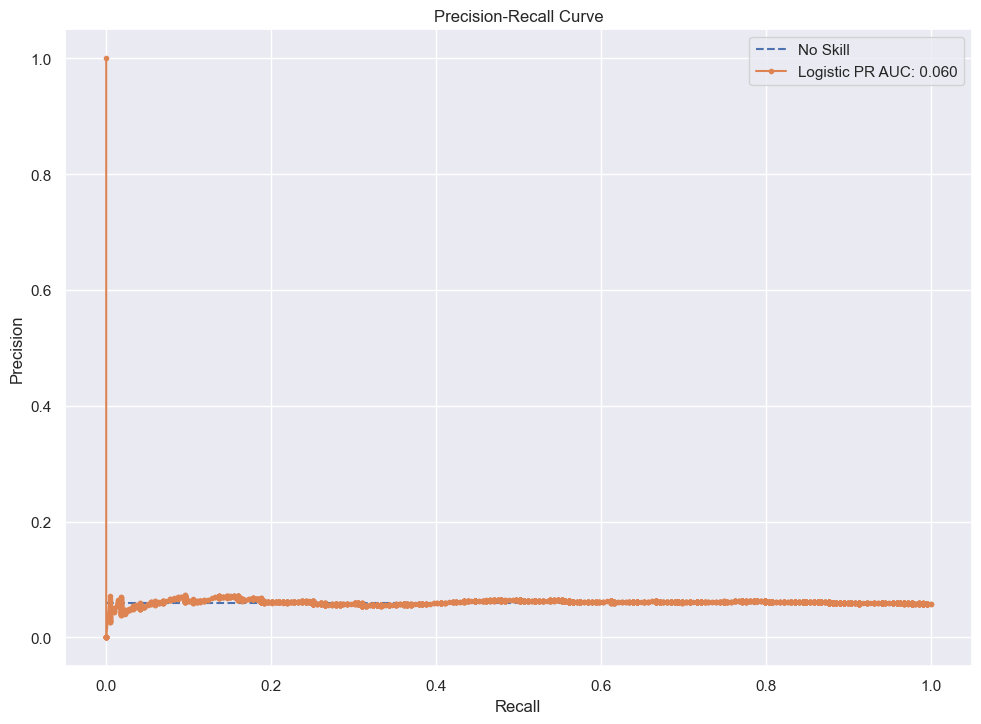

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


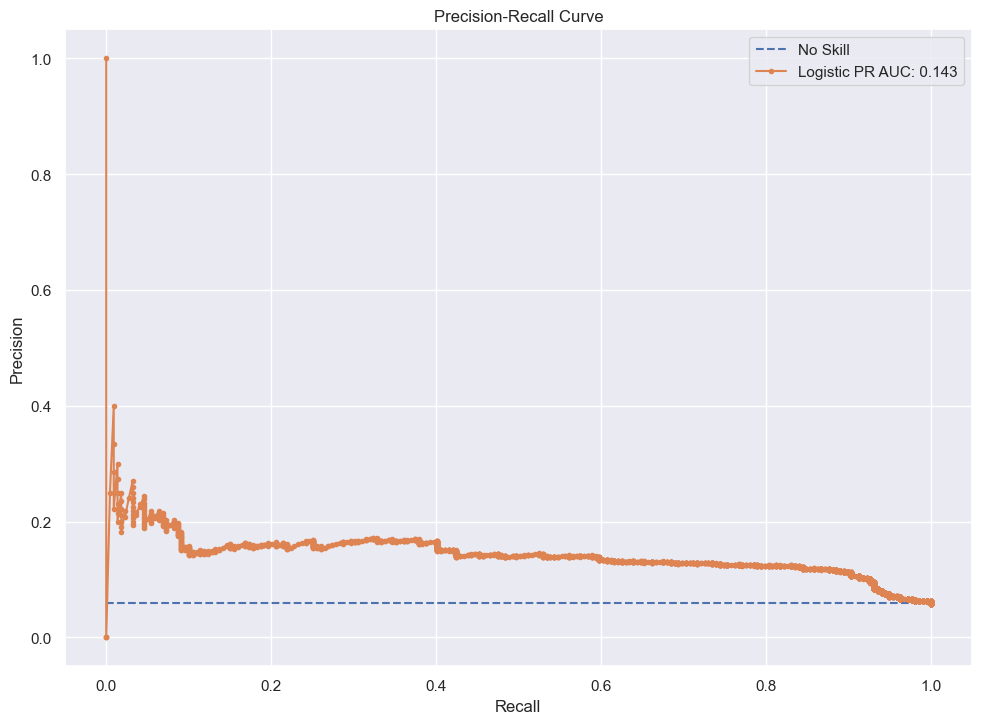

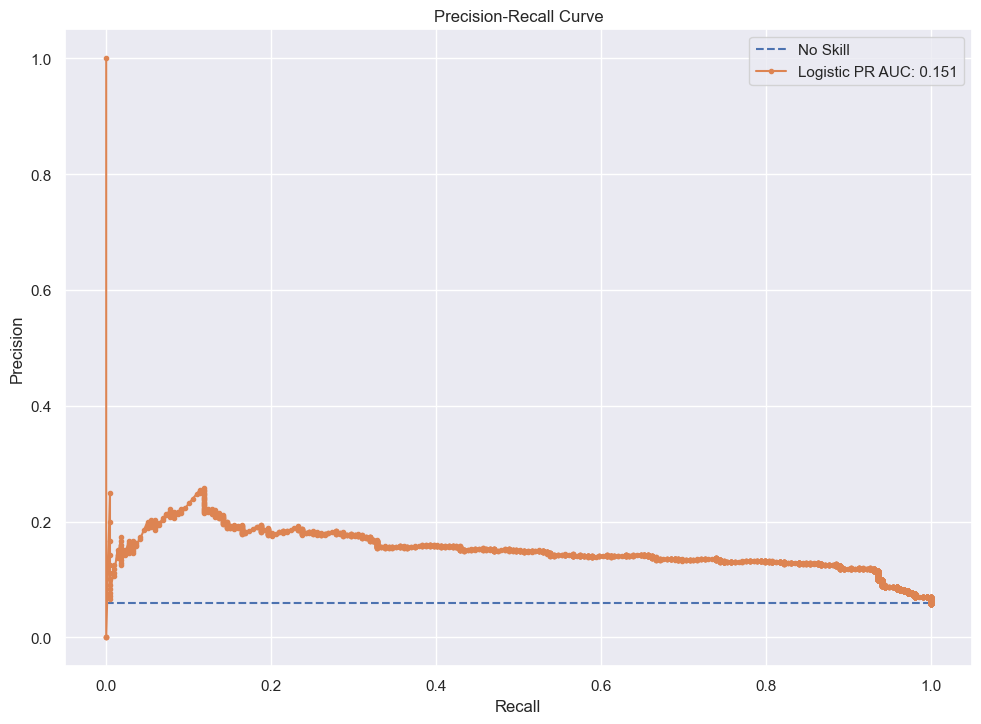

In [209]:
max_iter_list = [10, 100, 1000]
for i in max_iter_list:
    model_lg = LogisticRegression(max_iter=i, penalty='l2', class_weight={0:0.2, 1:0.8}) 
    model_lg.fit(X_train, y_train)
    y_pred_proba = model_lg.predict_proba(X_test)[:, 1]
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(y_lg[y_lg==1]) / len(y_lg)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # calculate model precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    # plot the model precision-recall curve
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, marker='.', label='Logistic PR AUC: %.3f' % auc_score)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    plt.title('Precision-Recall Curve')
    # show the plot
    plt.show()


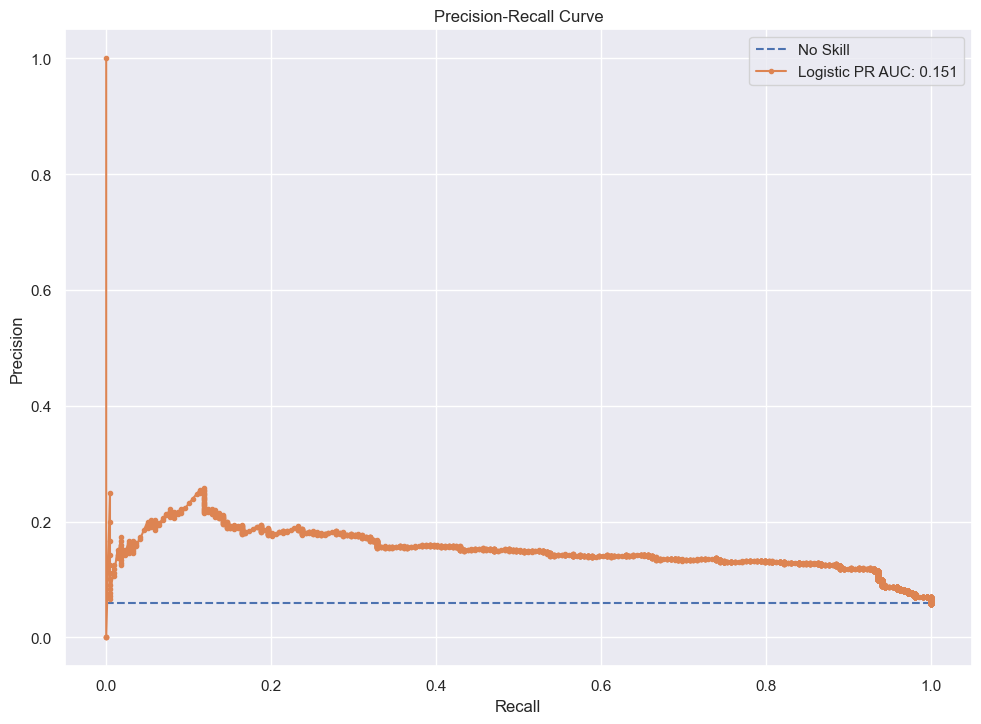

In [210]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_lg[y_lg==1]) / len(y_lg)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
# plot the model precision-recall curve
auc_score = auc(recall, precision)
plt.plot(recall, precision, marker='.', label='Logistic PR AUC: %.3f' % auc_score)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
plt.title('Precision-Recall Curve')
# show the plot
plt.show()

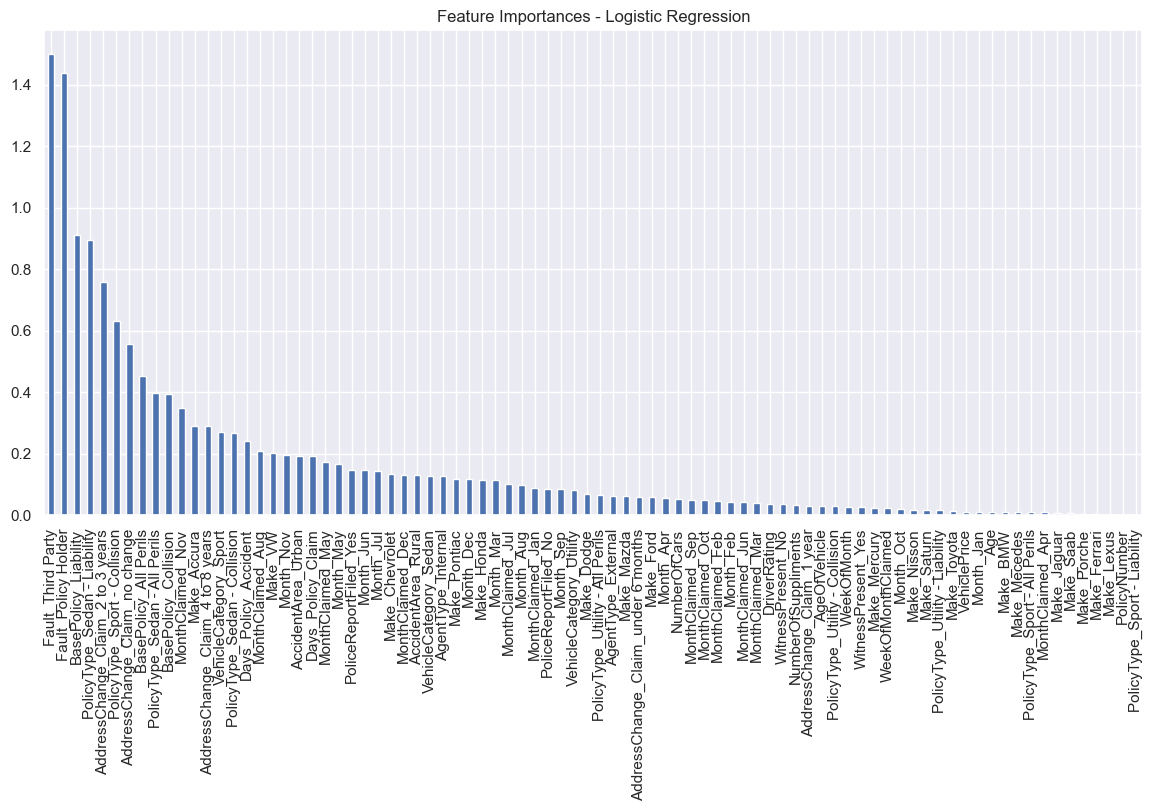

In [211]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

my_features = model_data_encoded. loc[:, model_data_encoded.columns != "FraudFound_P"].columns
importances = model_lg.coef_
avg_importance = np.mean(np.abs(importances), axis=0)
forest_importances = pd.Series(avg_importance, index=my_features).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances - Logistic Regression")
fig.tight_layout()

# Modeling - Random Forest

In [212]:
X_rf = model_data_encoded. loc[:, model_data_encoded.columns != "FraudFound_P"].values
y_rf = model_data_encoded["FraudFound_P"].values
#Split data into test data and train data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.25, random_state=10)

In [213]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
model_rf.fit(X_train_rf, y_train_rf)



RandomForestClassifier(class_weight='balanced', n_estimators=1000)

In [214]:
y_pred_proba_rf = model_rf.predict_proba(X_test_rf)[:, 1]

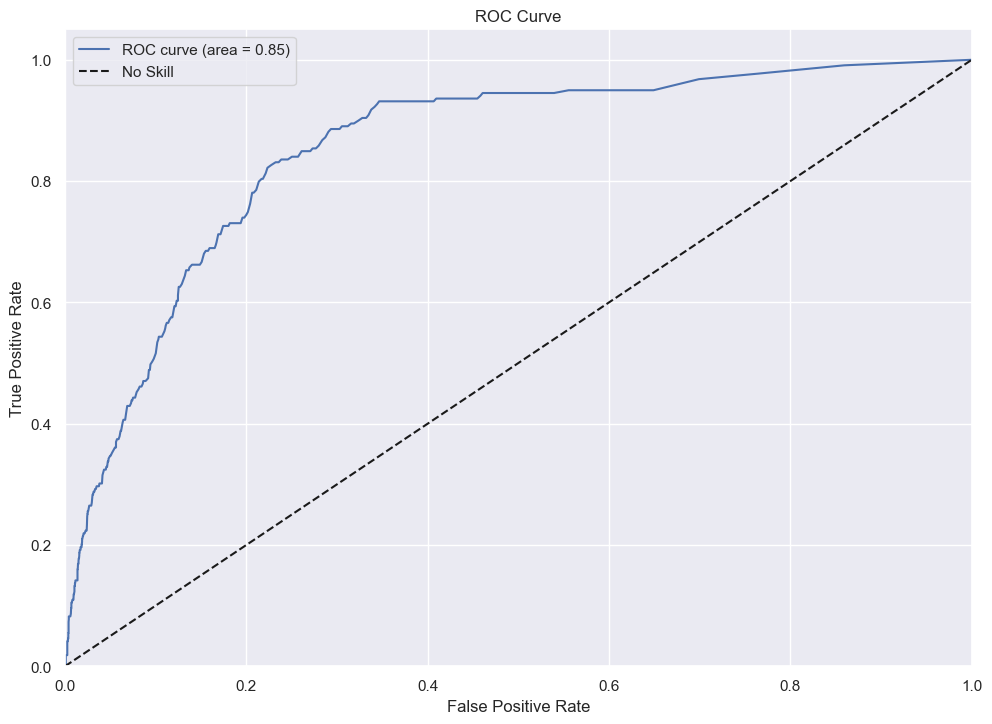

In [215]:
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_proba_rf) 
rf_roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

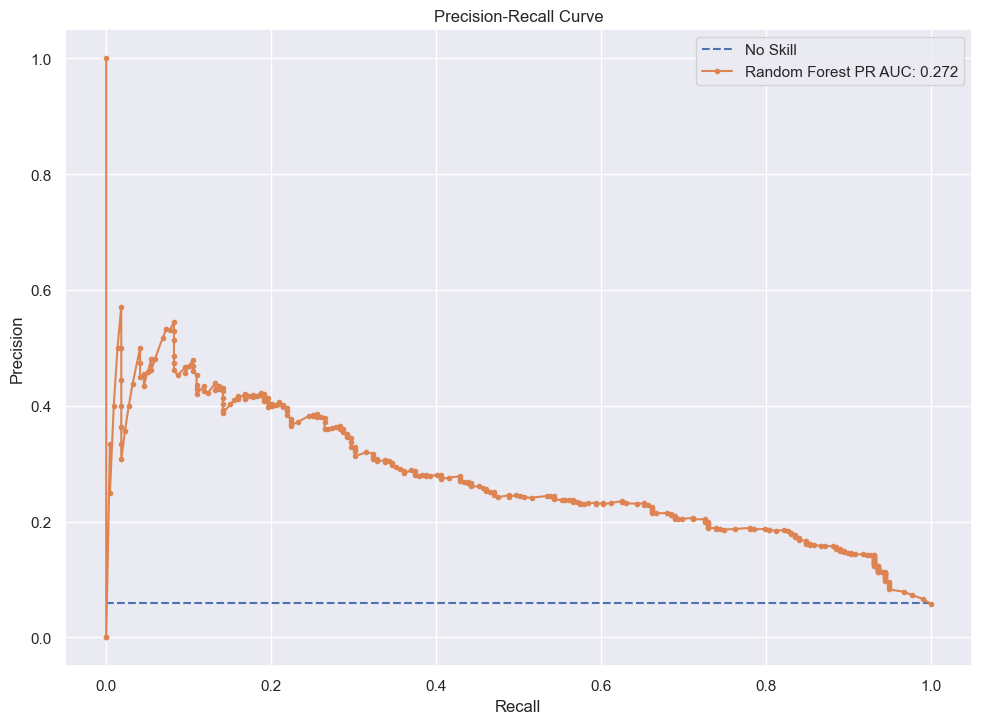

In [216]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_lg[y_lg==1]) / len(y_lg)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_rf, y_pred_proba_rf)
# plot the model precision-recall curve
rf_auc_score = auc(recall, precision)
plt.plot(recall, precision, marker='.', label='Random Forest PR AUC: %.3f' % rf_auc_score)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
plt.title('Precision-Recall Curve')
# show the plot
plt.show()

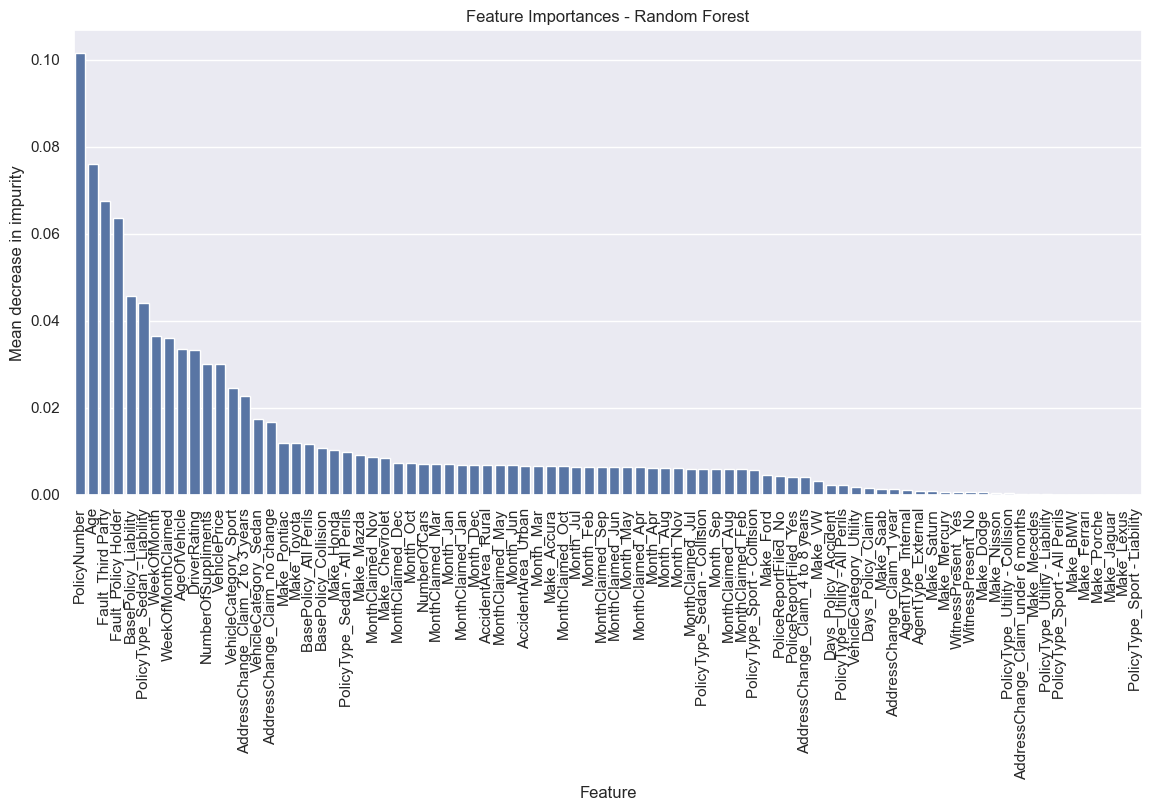

In [217]:
my_features = model_data_encoded. loc[:, model_data_encoded.columns != "FraudFound_P"].columns
importances = model_rf.feature_importances_

forest_importances = pd.Series(importances, index=my_features)

df_fi = pd.DataFrame({'Feature':forest_importances.index, 'Importance': forest_importances.values})
df_fi_sorted = df_fi.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots()
df_fi_plot = sns.barplot(df_fi_sorted, x="Feature", y="Importance")
df_fi_plot.tick_params(axis='x', labelrotation=90)
ax.set_title("Feature Importances - Random Forest")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Data Modeling - CatBoost

In [218]:
# Select and categorize features to be used in model

nominal = [
"MonthClaimed",
"Month",
"Fault",
"PolicyType",
"VehicleCategory",
"PoliceReportFiled",
"WitnessPresent",
"AgentType",
"AddressChange_Claim",
"BasePolicy",
'AccidentArea',
'Make'
]

ordinal = [
"Days_Policy_Accident",
"Days_Policy_Claim",
"AgeOfVehicle",
"NumberOfSuppliments",
"NumberOfCars",
"VehiclePrice",
]

numerical = ["WeekOfMonth",
"WeekOfMonthClaimed",
"DriverRating",
"Age",
"PolicyNumber"]

my_data_cat = fraud_data_cleaned.loc[:,nominal+ordinal+numerical+["FraudFound_P"]]

With Policy Number

In [219]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve

cat_columns = nominal + ordinal
cat_features = [my_data_cat.columns.get_loc(col) for col in cat_columns]

X_cat = my_data_cat.loc[:, my_data_cat.columns != "FraudFound_P"].values
y_cat = my_data_cat["FraudFound_P"].values
#Split data into test data and train data
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size=0.25, random_state=10)

clf = CatBoostClassifier(
    iterations=700, 
    learning_rate=0.1, 
    loss_function='CrossEntropy'
)

clf.fit(X_cat_train, y_cat_train, 
        cat_features=cat_features, 
        eval_set=(X_cat_test, y_cat_test), 
        verbose=False,
        plot=True,
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 700, 'learning_rate': 0.1, 'loss_function': 'CrossEntropy'}


In [220]:
# Evaluation - CatBoost
y_cat_pred_proba = clf.predict_proba(X_cat_test)[:, 1]

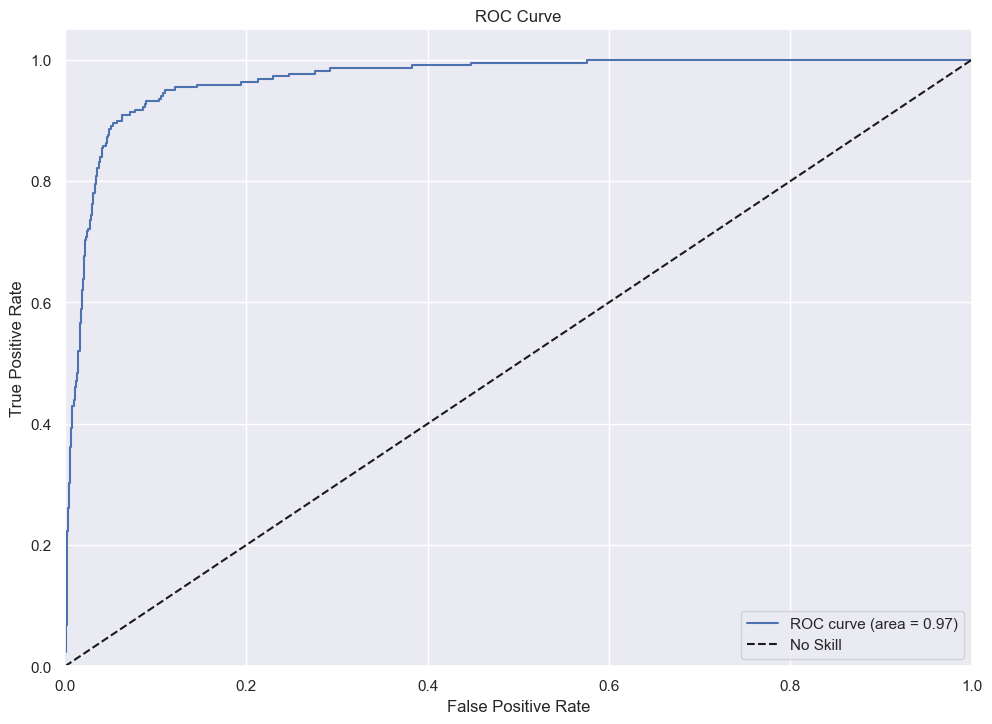

In [221]:
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y_cat_test, y_cat_pred_proba) 
cb_roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % cb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

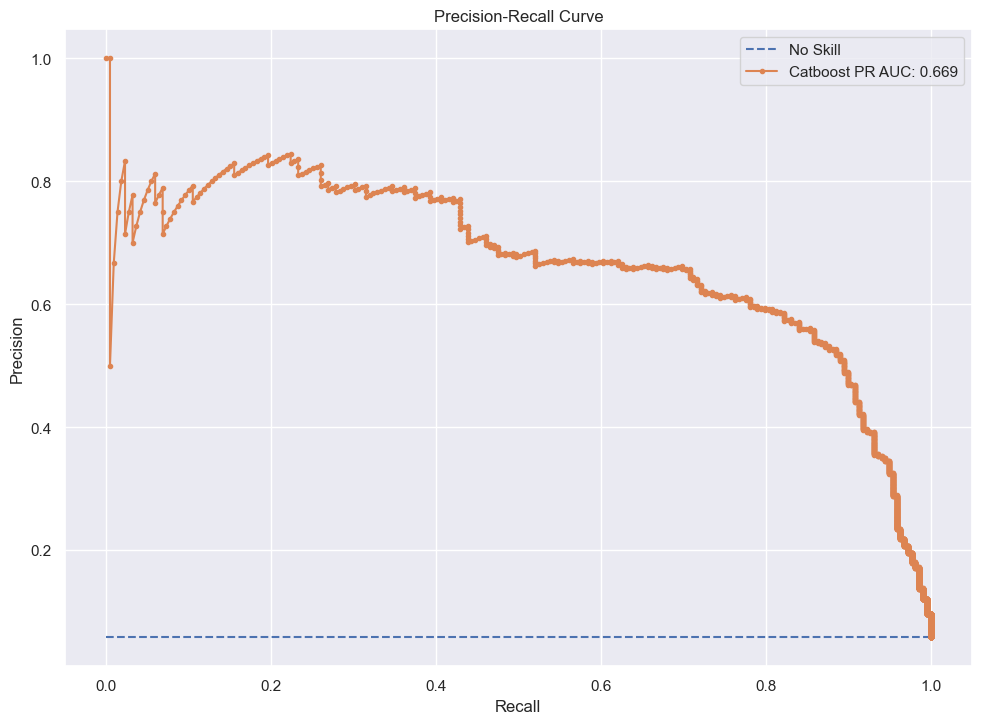

In [222]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_cat[y_cat==1]) / len(y_cat)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_cat_test, y_cat_pred_proba)
# plot the model precision-recall curve
cb_auc_score = auc(recall, precision)
plt.plot(recall, precision, marker='.', label='Catboost PR AUC: %.3f' % cb_auc_score)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
plt.title('Precision-Recall Curve')
# show the plot
plt.show()

In [223]:
# Select and categorize features to be used in model

nominal = [
"MonthClaimed",
"Month",
"Fault",
"PolicyType",
"VehicleCategory",
"PoliceReportFiled",
"WitnessPresent",
"AgentType",
"AddressChange_Claim",
"BasePolicy",
'AccidentArea',
'Make'
]

ordinal = [
"Days_Policy_Accident",
"Days_Policy_Claim",
"AgeOfVehicle",
"NumberOfSuppliments",
"NumberOfCars",
"VehiclePrice",
]

numerical_small = ["WeekOfMonth",
"WeekOfMonthClaimed",
"DriverRating",
"Age"]

new_my_data_cat = fraud_data_cleaned.loc[:,nominal+ordinal+numerical_small+["FraudFound_P"]]

In [224]:

cat_columns = nominal + ordinal
cat_features = [new_my_data_cat.columns.get_loc(col) for col in cat_columns]

X_newcat = new_my_data_cat.loc[:, new_my_data_cat.columns != "FraudFound_P"].values
y_newcat = new_my_data_cat["FraudFound_P"].values
#Split data into test data and train data
X_newcat_train, X_newcat_test, y_newcat_train, y_newcat_test = train_test_split(X_newcat, y_newcat, test_size=0.25, random_state=10)

new_clf = CatBoostClassifier(
    iterations=700, 
    learning_rate=0.1, 
    loss_function='CrossEntropy'
)

new_clf.fit(X_newcat_train, y_newcat_train, 
        cat_features=cat_features, 
        eval_set=(X_newcat_test, y_newcat_test), 
        verbose=False,
        plot=True,
)

print('CatBoost model is fitted: ' + str(new_clf.is_fitted()))
print('CatBoost model parameters:')
print(new_clf.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 700, 'learning_rate': 0.1, 'loss_function': 'CrossEntropy'}


In [225]:
# Evaluation - CatBoost
y_newcat_pred_proba = new_clf.predict_proba(X_newcat_test)[:, 1]

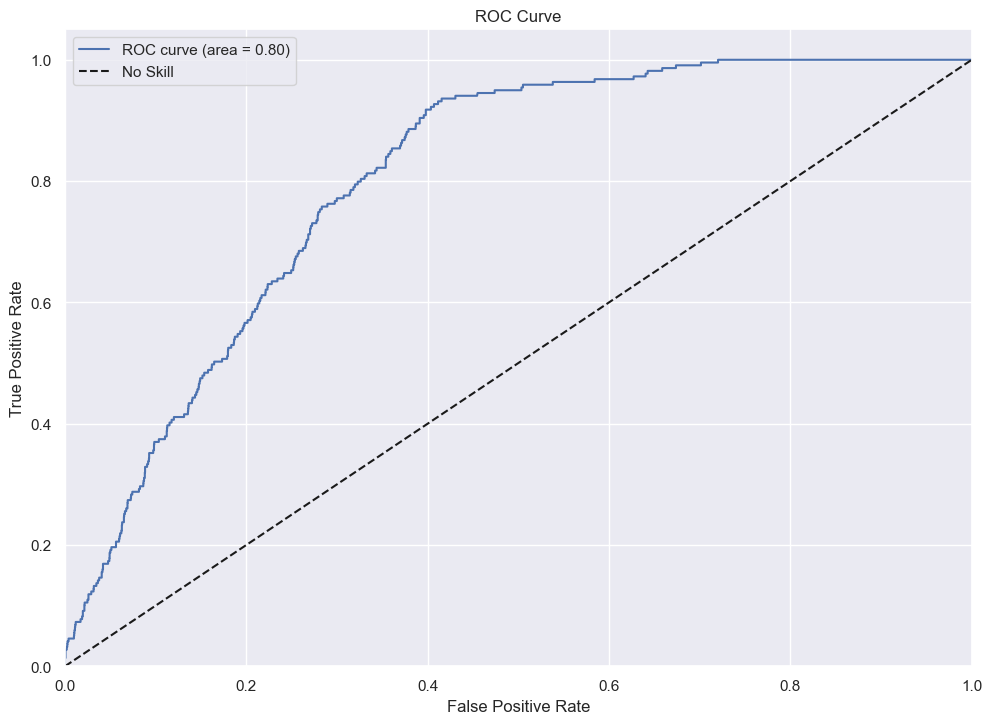

In [226]:
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y_newcat_test, y_newcat_pred_proba) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

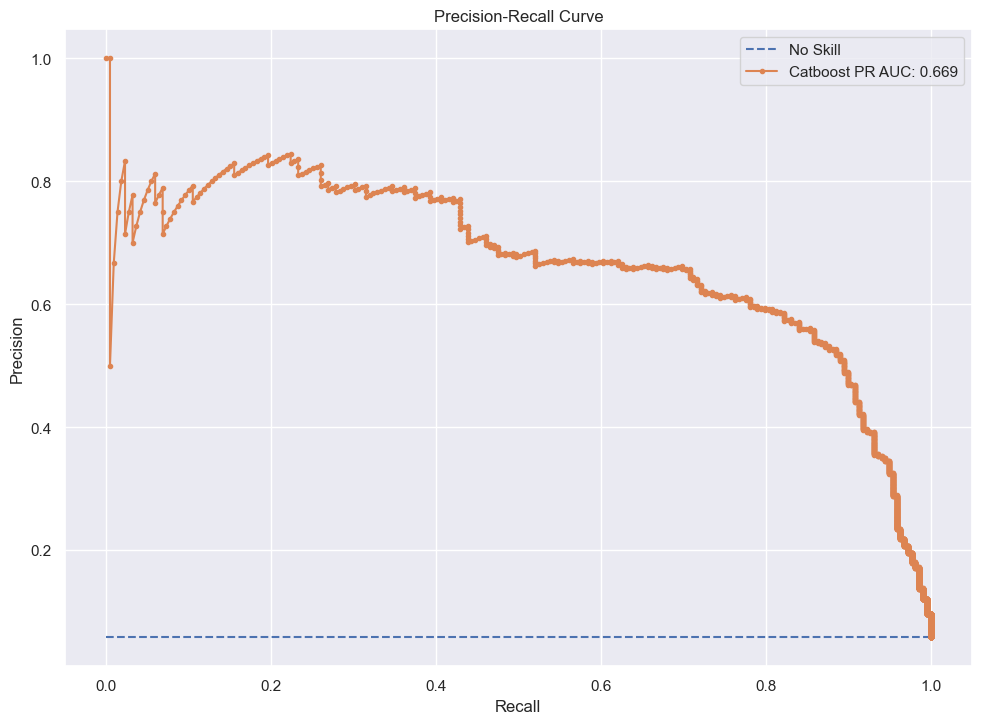

In [227]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_cat[y_cat==1]) / len(y_cat)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_cat_test, y_cat_pred_proba)
# plot the model precision-recall curve
auc_score = auc(recall, precision)
plt.plot(recall, precision, marker='.', label='Catboost PR AUC: %.3f' % auc_score)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
plt.title('Precision-Recall Curve')
# show the plot
plt.show()

In [228]:
cat_features = my_data_cat.loc[:, my_data_cat.columns != "FraudFound_P"].columns

cat_importances = clf.get_feature_importance(type='PredictionValuesChange')


catboost_importances = pd.Series(cat_importances, index=cat_features)


In [229]:
df_cb = pd.DataFrame({'Feature':catboost_importances.index, 'Importance': catboost_importances.values})
df_cb_sorted = df_cb.sort_values(by='Importance', ascending=False)

Text(0.5, 1.0, 'Feature Importances - CatBoost')

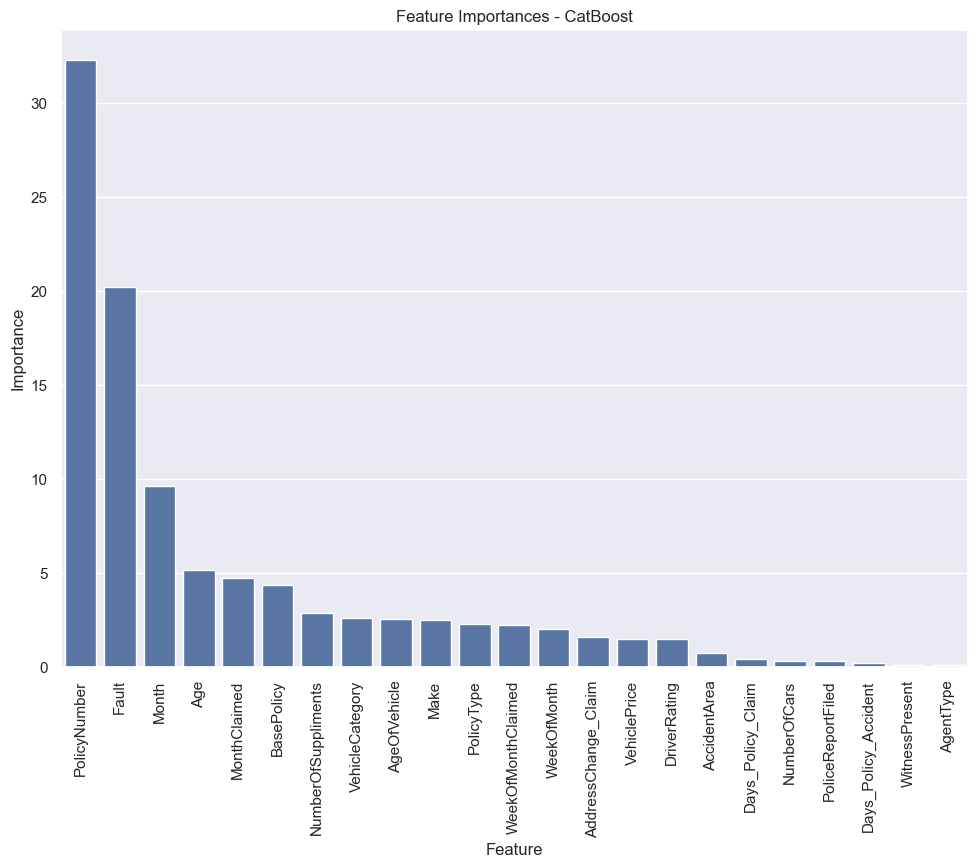

In [230]:
import seaborn as sns

df_cb_plot = sns.barplot(df_cb_sorted, x="Feature", y="Importance")
df_cb_plot.tick_params(axis='x', labelrotation=90)
df_cb_plot.set_title("Feature Importances - CatBoost")

# Modeling - XGBClassifier

In [231]:
# Select and categorize features to be used in model

nominal_xgb = [
"MonthClaimed",
"Month",
"Fault",
"PolicyType",
"VehicleCategory",
"PoliceReportFiled",
"WitnessPresent",
"AgentType",
"AddressChange_Claim",
"BasePolicy",
'AccidentArea',
'Make'
]

ordinal_xgb = [
"Days_Policy_Accident",
"Days_Policy_Claim",
"AgeOfVehicle",
"NumberOfSuppliments",
"NumberOfCars",
"VehiclePrice",
]

numerical_xgb = ["WeekOfMonth",
"WeekOfMonthClaimed",
"DriverRating",
"Age",
"PolicyNumber"]

my_data_xgb = model_data_encoded

In [232]:
X_xgb = my_data_xgb.loc[:, my_data_xgb.columns != "FraudFound_P"].values
y_xgb = my_data_xgb["FraudFound_P"].values
#Split data into test data and train data
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.25, random_state=10)

## Test 1

In [233]:
# Let's Create  a dictionary with random Parameters for all XGBoostClassifier parameters
space={
    'objective': 'binary:logistic', 
    'use_label_encoder': False, 
    'base_score': 0.5,
    'booster': 'gbtree',
    'colsample_bylevel' : 1,
    'colsample_bynode' : 1,
    'colsample_bytree' : 1,
    'enable_categorical': False,
    #'gamma': hp.uniform('gamma', 0,10),
    'gpu_id': -1,
    'importance_type': None,
    'interaction_constraints': '', 
    'learning_rate': 0.300000012, 
    'max_delta_step': 0,
    #'max_depth': hp.randint("max_depth", 10)+3,
    #'min_child_weight' : hp.randint('min_child_weight', 4)+1,
    'monotone_constraints': '()',
    #'n_estimators': hp.randint('n_estimators', 150)+50,
    'n_jobs': -1,
    'num_parallel_tree':1, 
    'predictor':'auto', 
    'random_state': 0,
    #'reg_alpha' : hp.randint('reg_alpha', 10),
    #'reg_lambda' : hp.randint('reg_lambda', 10),
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': 'exact',
    'validate_parameters':1,
    'verbosity': None,
    'eval_metric': 'aucpr'
    }

In [234]:
# Let's Define a function for our Space Dictionary and train our model
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, accuracy_score
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe



def objective(space):
    clf_model= XGBClassifier(**space)
    
    evaluation = [( X_xgb_train, y_xgb_train), ( X_xgb_test, y_xgb_test)]
    
    clf_model.fit(X_xgb_train, y_xgb_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf_model.predict(X_xgb_test)
    accuracy = accuracy_score(y_xgb_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy}

In [235]:
# Let's Create The optimized model with best hyperparameters of XGboost Classifier
clf_model_optimizied = XGBClassifier(
    objective= 'binary:logistic', 
    use_label_encoder= False, 
    base_score= 0.5, 
    booster= 'gbtree', 
    colsample_bylevel= 1, 
    colsample_bynode= 1, 
    colsample_bytree= 1, 
    enable_categorical= False, 
    gamma= 1.3119030461351664, 
    gpu_id= -1, 
    importance_type= None, 
    interaction_constraints= '', 
    learning_rate= 0.300000012, 
    max_delta_step= 0, 
    max_depth= 7, 
    min_child_weight= 1, 
    monotone_constraints= '()',
    n_estimators= 58, 
    n_jobs= 4, 
    num_parallel_tree= 1, 
    predictor= 'auto', 
    random_state= 0, 
    reg_alpha= 2, 
    reg_lambda= 0, 
    scale_pos_weight= 1, 
    subsample= 1, 
    tree_method= 'exact', 
    validate_parameters= 1, 
    verbosity= None, 
    eval_metric= 'aucpr'
)
print(clf_model_optimizied.get_params())

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'aucpr', 'feature_types': None, 'gamma': 1.3119030461351664, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': 0, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'multi_strategy': None, 'n_estimators': 58, 'n_jobs': 4, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 2, 'reg_lambda': 0, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'use_label_encoder': False, 'gpu_id': -1, 'predictor': 'auto'}


In [236]:
xgb_model = clf_model_optimizied.fit(X_xgb_train, y_xgb_train)


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


In [237]:
y_preds = xgb_model.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [238]:
# Evaluation - XGBoost
y_xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

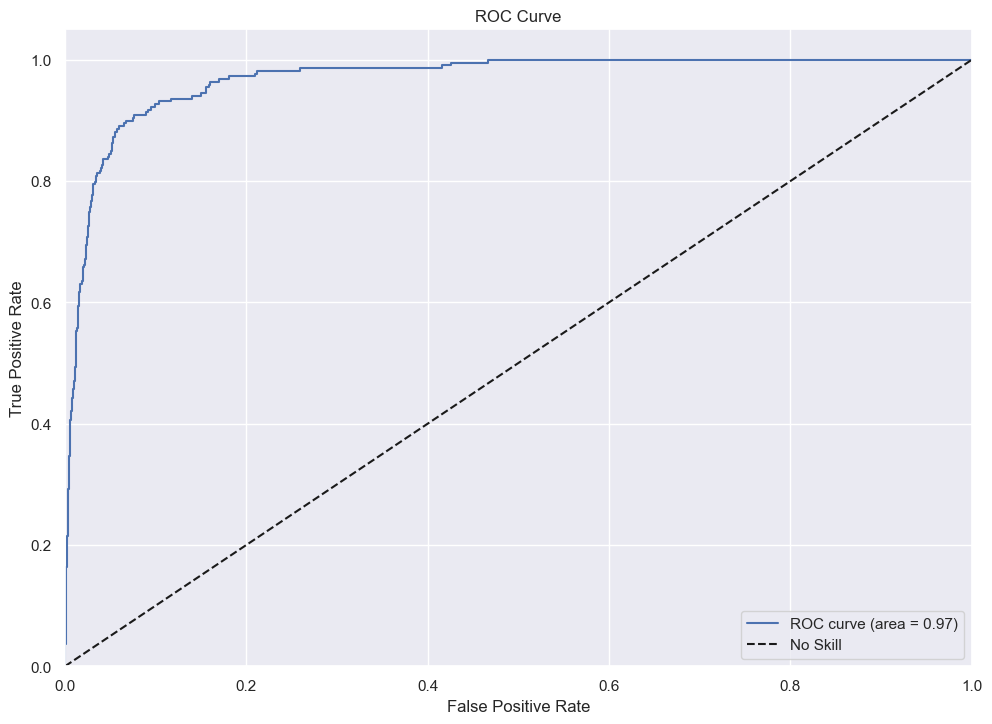

In [239]:

fpr, tpr, thresholds = roc_curve(y_test, y_xgb_pred_proba) 
xgb_roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

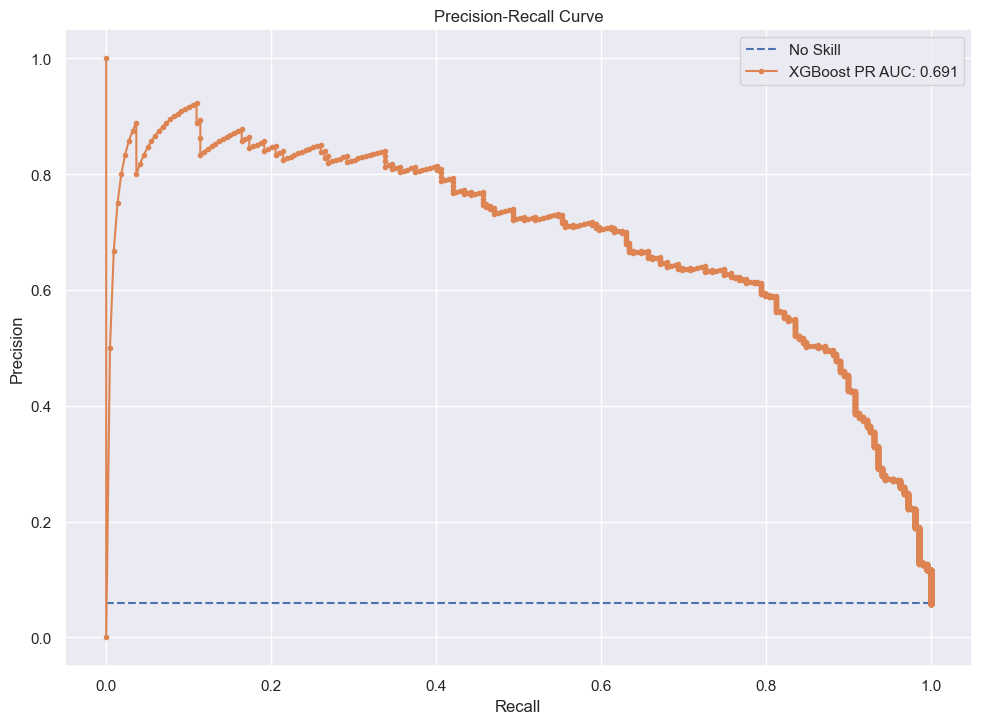

In [240]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_xgb[y_xgb==1]) / len(y_xgb)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_xgb_test, y_xgb_pred_proba)
# plot the model precision-recall curve
auc_score = auc(recall, precision)
plt.plot(recall, precision, marker='.', label='XGBoost PR AUC: %.3f' % auc_score)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
plt.title('Precision-Recall Curve')
# show the plot
plt.show()

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'aucpr', 'feature_types': None, 'gamma': 1.3119030461351664, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': 1, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'multi_strategy': None, 'n_estimators': 13, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 2, 'reg_lambda': 1, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'use_label_encoder': False, 'gpu_id': -1, 'predictor': 'auto'}


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


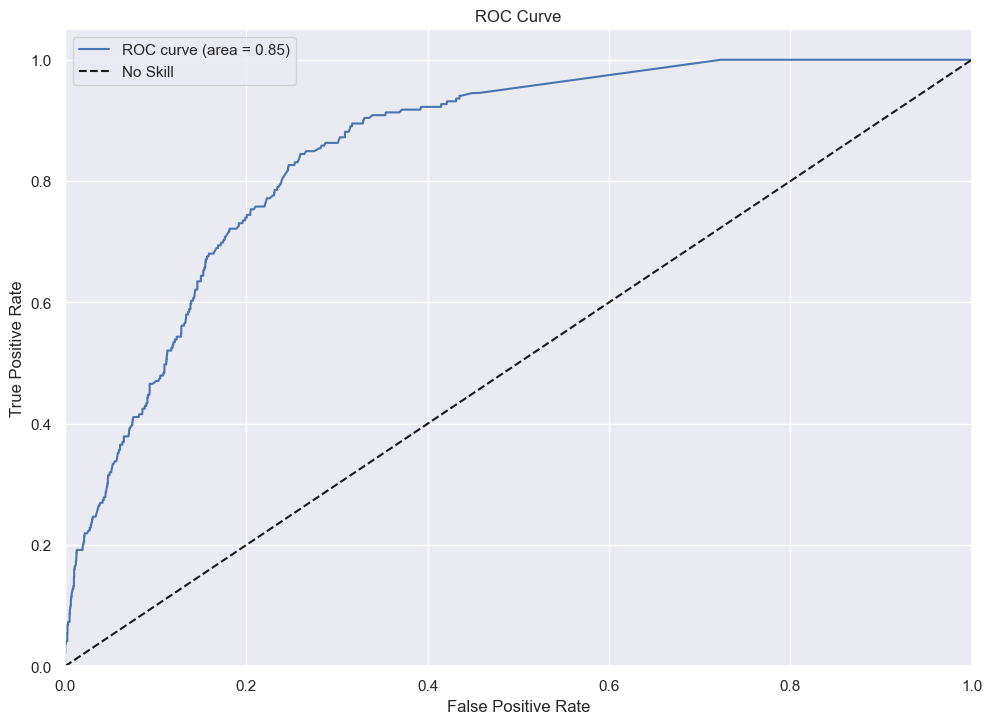

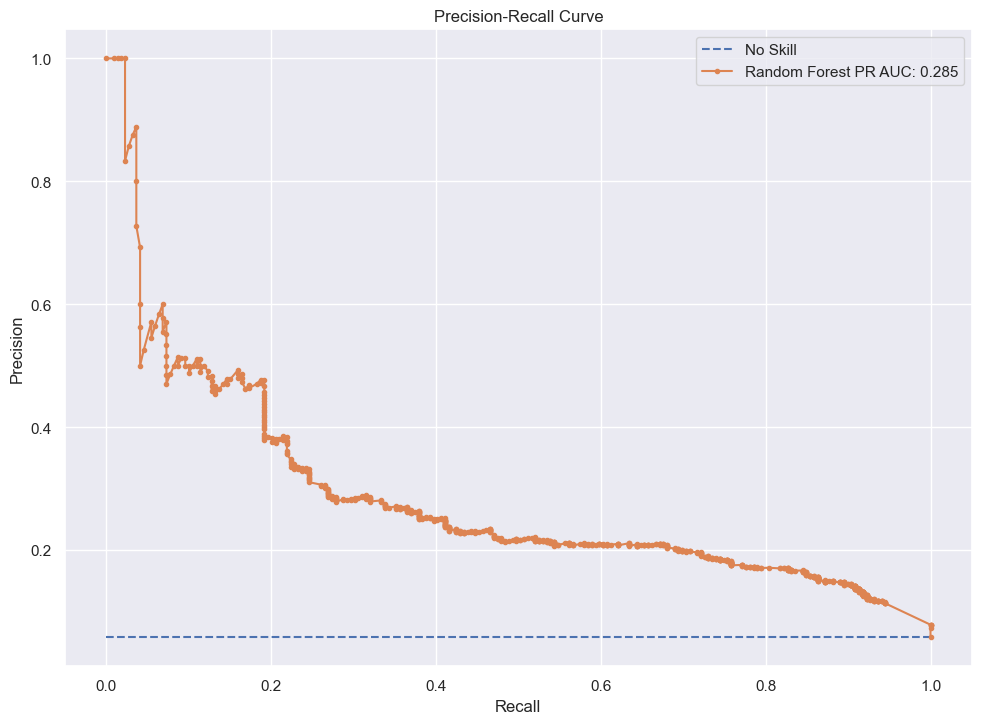

In [241]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, accuracy_score

def objective(space):
    clf_model= XGBClassifier(**space)
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf_model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf_model.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy}
# Let's Create The optimized model with best hyperparameters of XGboost Classifier
clf_model_optimizied = XGBClassifier(
    objective= 'binary:logistic', 
    use_label_encoder= False, 
    base_score= 0.5, 
    booster= 'gbtree', 
    colsample_bylevel= 1, 
    colsample_bynode= 1, 
    colsample_bytree= 1, 
    enable_categorical= False, 
    gamma= 1.3119030461351664, 
    gpu_id= -1, 
    importance_type= None, 
    interaction_constraints= '', 
    learning_rate= 0.300000012, 
    max_delta_step= 1, 
    max_depth= 7, 
    min_child_weight= 1, 
    monotone_constraints= '()',
    n_estimators= 13, 
    n_jobs= 8, 
    num_parallel_tree= 1, 
    predictor= 'auto', 
    random_state= 0, 
    reg_alpha= 2, 
    reg_lambda=1, 
    scale_pos_weight= 1, 
    subsample= 1, 
    tree_method= 'exact', 
    validate_parameters= 1, 
    verbosity= None, 
    eval_metric= 'aucpr'
)
print(clf_model_optimizied.get_params())
xgb_model = clf_model_optimizied.fit(X_train, y_train)

xgb_model.get_params()
y_preds = xgb_model.predict(X_test)
y_preds
# Evaluation - XGBoost
y_xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_xgb_pred_proba) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_lg[y_lg==1]) / len(y_lg)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_xgb_pred_proba)
# plot the model precision-recall curve
auc_score = auc(recall, precision)
plt.plot(recall, precision, marker='.', label='Random Forest PR AUC: %.3f' % auc_score)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
plt.title('Precision-Recall Curve')
# show the plot
plt.show()

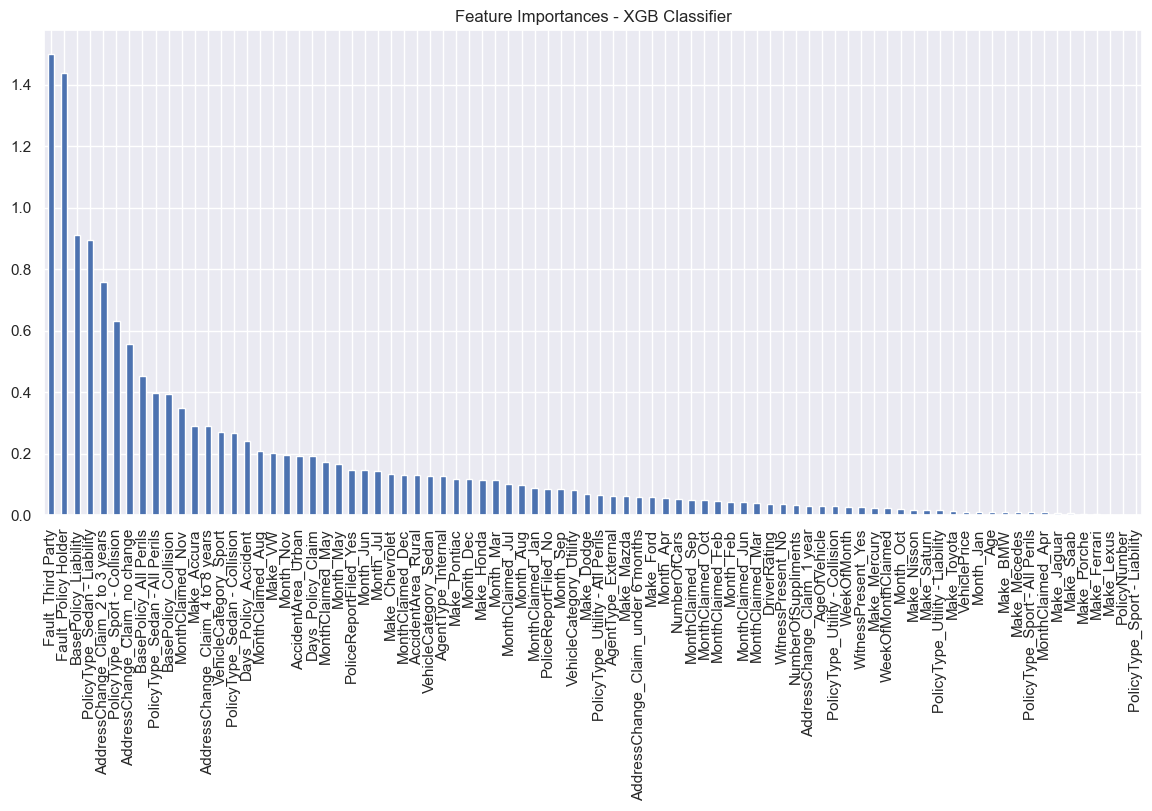

In [242]:
my_features_xgb = model_data_encoded. loc[:, model_data_encoded.columns != "FraudFound_P"].columns
importances_xgb = xgb_model.feature_importances_
avg_importance_xgb = np.mean(np.abs(importances), axis=0)
xgb_importances = pd.Series(avg_importance, index=my_features_xgb).sort_values(ascending=False)

fig, ax = plt.subplots()
xgb_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances - XGB Classifier")
fig.tight_layout()



In [243]:
results_table = pd.DataFrame({"Logistic Regression": {"ROC AUC": lg_roc_auc, "PR AUC": lg_auc_score},
                 "Random Forest": {"ROC AUC": rf_roc_auc, "PR AUC": rf_auc_score},
                 "CatBoost": {"ROC AUC": cb_roc_auc, "PR AUC": cb_auc_score}, 
                 "XGBoost Classifier": {"ROC AUC": xgb_roc_auc, "PR AUC": xgb_auc_score}})
results_table

,Logistic Regression,Random Forest,CatBoost,XGBoost Classifier
ROC AUC,0.791367,0.854339,0.968106,0.968860
PR AUC,0.155633,0.272369,0.669021,0.690807
